# Βαθιά μάθηση στο CIFAR-100

Ομάδα: 39  
Ασημάκη Γεωργία-Γρηγορία: 03116197, a.tzotzo@gmail.com  
Μετζάκης Ιωάννης: 03116202, johnmetzakis@gmail.com   
Σκούφης Πέτρος: 03116141, pskoufis13@gmail.com

## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)

# select a url for a unique subset of CIFAR-100 with 20, 40, 60, or 80 classes
def select_classes_number(classes_number = 20):
  cifar100_20_classes_url = "https://pastebin.com/raw/nzE1n98V"
  cifar100_40_classes_url = "https://pastebin.com/raw/zGX4mCNP"
  cifar100_60_classes_url = "https://pastebin.com/raw/nsDTd3Qn"
  cifar100_80_classes_url = "https://pastebin.com/raw/SNbXz700"
  if classes_number == 20:
    return cifar100_20_classes_url
  elif classes_number == 40:
    return cifar100_40_classes_url
  elif classes_number == 60:
    return cifar100_60_classes_url
  elif classes_number == 80:
    return cifar100_80_classes_url
  else:
    return -1

In [ ]:
# load the entire dataset
(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 2s 0us/step


In [ ]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με ένα μοναδικό ξεχωριστό υποσύνολο του CIFAR-100
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό της ομάδας σας.

In [ ]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 39

Στο επόμενο κελί μπορείτε να διαλέξετε το πλήθος των κατηγορίων σας: 20 (default), 40, 60 ή 80.

In [ ]:
NUM_OF_CLASSES = 20

In [ ]:
# select the number of classes
cifar100_classes_url = select_classes_number(NUM_OF_CLASSES)

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [ ]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [ ]:
# print our classes
print(our_classes)

[' baby', ' bed', ' butterfly', ' chimpanzee', ' clock', ' dolphin', ' forest', ' girl', ' keyboard', ' lawn_mower', ' man', ' mouse', ' orange', ' otter', ' poppy', ' possum', ' ray', ' tiger', ' tractor', ' whale']


In [ ]:
our_dict = {our_index[i] : i for i in range(len(our_index))}

In [ ]:
print(x_train_ds[1].shape)

(32, 32, 3)


1500
Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


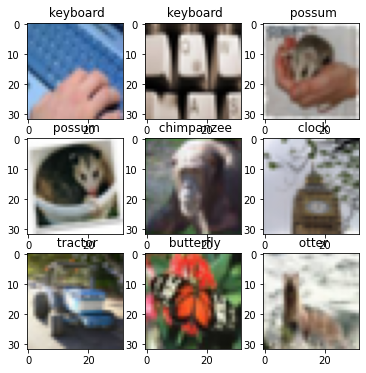

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

print(len(x_val))

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

Γραφικές παραστάσεις εκπαίδευσης και απόδοση στο σύνολο ελέγχου

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	plt.figure(figsize=(8, 8))
	plt.suptitle('Training Curves')
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='val')
	plt.legend(loc='upper right')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='val')
	plt.legend(loc='lower right')
	return plt
 
# print test set evaluation metrics
def model_evaluation(model, evaluation_steps):
	print('\nTest set evaluation metrics')
	loss0,accuracy0 = model.evaluate(test_ds, steps = evaluation_steps)
	print("loss: {:.2f}".format(loss0))
	print("accuracy: {:.2f}".format(accuracy0))

def model_report(model, history, evaluation_steps = 10):
	plt = summarize_diagnostics(history)
	plt.show()
	model_evaluation(model, evaluation_steps)

## Δοκιμές διαφορετικών μοντέλων

Μπορείτε είτε να δοκιμάσετε μοντέλα "from scratch", όπου ορίζετε την αρχιτεκτονική του δικτύου όπως θέλετε, είτε να χρησιμοποιήσετε μεταφορά μάθησης.



## Μοντέλα "from scratch"

Μπορείτε να τροποποιήσετε/αλλάξετε το αρχικό μικρό συνελικτικό δίκτυο του παραδείγματος. Μπορείτε να συμβουλευτείτε 
- τη [βιβλιογραφία απο το leaderboard του CIFAR-100](https://benchmarks.ai/cifar-100) για αρχιτεκτονικές και παραμέτρους των δικτύων
- ή/και να πάρετε ιδέες [από σχετική αναζήτηση στο Google Scholar](https://scholar.google.gr/scholar?hl=en&as_sdt=0%2C5&q=cifar+100+cnn&oq=cifa)

Παρακάτω θα κάνουμε μια απόπειρα να επεκτείνουμε το απλό CNN μοντέλο που μας δόθηκε σε ένα πιο βαθύ μοντέλο εισάγοντας επίσης νέες μορφές επιπέδων, όπως τα επίπεδα **BatchNormalization** και **Dropout**. Παρακάτω εξηγούμε συνοπτικά την σημασία αυτών των επιπέδων στο δίκτυό μας.

* Batch Normalization: 
Το επίπεδο αυτό κανονικοποιεί τις εισόδους κάθε επιπέδου με αποτέλεσμα να βελτιώνει τη σωστή διάδοση των σφαλμάτων προς τα πίσω στο δίκτυο και μειώνοντας την ταχύτητα εκπαίδευσης.

https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/

* Dropout:
Το επίπεδο αυτό χρησιμοποιείται με σκοπό να καταπολεμήσει το overfitting, αφού τυχαία αγνοεί ένα ποσοστό από τις εξόδους του τρέχοντος επιπέδου στο επόμενο επίπεδο.

https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/


In [ ]:
# simple function to map labels to our labels

def map_label(x):
    x = [[our_dict[i[0]]] for i in x]
    return np.array(x)

In [ ]:
# we user prefetch https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch 
# see also AUTOTUNE
# the dataset is now "infinite"

BATCH_SIZE = 128
AUTOTUNE = tf.data.experimental.AUTOTUNE # https://www.tensorflow.org/guide/data_performance

def _input_fn(x,y, BATCH_SIZE):
    ds = tf.data.Dataset.from_tensor_slices((x,y))
    ds = ds.shuffle(buffer_size=data_size)
    ds = ds.repeat()
    if (augmentation == True):
        augs = [crop_aug, flip_aug, color_aug]
        for f in augs:
            ds = ds.map(f)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    #ds = ds.cache()
    return ds

augmentation = False
train_ds =_input_fn(x_train,map_label(y_train), BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,map_label(y_val), BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,map_label(y_test), BATCH_SIZE) #PrefetchDataset object
# steps_per_epoch and validation_steps for training and validation: https://www.tensorflow.org/guide/keras/train_and_evaluate

def train_model(model, epochs = 10, steps_per_epoch = 2, validation_steps = 1, cb = False):
    if cb == True:
        callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights = True)
        history = model.fit(train_ds, callbacks=[callback], epochs=epochs, 
                        steps_per_epoch=steps_per_epoch, validation_data=validation_ds, 
                     validation_steps=validation_steps)
    else:
        history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps)
    return(history)

Στο σημείο αυτό παρουσιάζουμε το τελικό μοντέλο στο οποίο καταλήξαμε, έπειτα από σταδιακή προσθήκη επιπέδων. Όπως φαίνεται στο δίκτυό μας επαναλμβάνεται μια δομική μονάδα από δύο συνέλιξεις - BatchNormalization - MaxPooling2D - Dropout, η οποία επαναλαμβάνεται 5 φορές με αύξηση των παραμέτρων όσο προψωράμε πιο βαθιά, αφού κερδίζουμε υπολογιστικό χρόνο από τον υποδιπλασιασμό της διάστασης της εισόδου. 

Στο τέλος του δικτύου γίνεται Flatten και με διαδοχικά Πυκνά επίπεδα καταλήγουμε στην έξοδο.

In [ ]:
L2_DECAY_RATE = 0.0005

def init_custom_model(summary):    
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    #model.add(layers.Conv2D(64, kernel_size=(3, 3),activation='elu', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, kernel_size=(3, 3),  padding='same',activation='relu',kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    #model.add(layers.Conv2D(128, kernel_size=(2, 2),activation='elu', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, kernel_size=(3, 3),  padding='same',activation='relu',kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    model.add(layers.Conv2D(128, kernel_size=(3, 3),  padding='same', activation='relu',kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    #model.add(layers.Conv2D(256, kernel_size=(2, 2), padding='same', activation='relu', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(256, kernel_size=(3, 3),  padding='same',activation='relu',kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    model.add(layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    #model.add(layers.Conv2D(512, kernel_size=(2, 2), padding='same', activation='relu', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(512, kernel_size=(3, 3),  padding='same',activation='relu',kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    model.add(layers.Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    #model.add(layers.Conv2D(1024, kernel_size=(2, 2), padding='same', activation='relu', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.GlobalAveragePooling2D())
    
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))
    #model.add(layers.Dense(20, activation='softmax'))
    #model.add(layers.Dropout(0.25))
    model.add(layers.Dense(128, activation='relu'))
    #model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(80, activation='softmax'))
    
    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
    if summary: 
        model.summary()
    return model

**Αποτελέσματα για 20 κλάσεις**

Εκπαίδευση με EarlyStopping με μεγάλο patience (30 εποχές)

In [ ]:
CUSTOM_MODEL_20 = init_custom_model(summary = True)
CUSTOM_MODEL_20_history = train_model(CUSTOM_MODEL_20, 400, 66, 5, cb=True)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_40 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_41 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 16, 16, 32)      

66/66 [==============================] - 1s 21ms/step - loss: 1.5958 - accuracy: 0.6560 - val_loss: 2.2116 - val_accuracy: 0.5250
Epoch 22/400
66/66 [==============================] - 1s 21ms/step - loss: 1.5722 - accuracy: 0.6626 - val_loss: 2.2213 - val_accuracy: 0.5328
Epoch 23/400
66/66 [==============================] - 1s 20ms/step - loss: 1.5266 - accuracy: 0.6778 - val_loss: 2.2632 - val_accuracy: 0.4984
Epoch 24/400
66/66 [==============================] - 1s 21ms/step - loss: 1.5198 - accuracy: 0.6875 - val_loss: 2.2547 - val_accuracy: 0.5188
Epoch 25/400
66/66 [==============================] - 1s 20ms/step - loss: 1.4598 - accuracy: 0.7054 - val_loss: 2.5285 - val_accuracy: 0.4969
Epoch 26/400
66/66 [==============================] - 1s 21ms/step - loss: 1.4435 - accuracy: 0.7192 - val_loss: 2.1899 - val_accuracy: 0.5312
Epoch 27/400
66/66 [==============================] - 1s 21ms/step - loss: 1.3910 - accuracy: 0.7369 - val_loss: 2.2530 - val_accuracy: 0.5359
Epoch 28/400

66/66 [==============================] - 1s 20ms/step - loss: 1.1125 - accuracy: 0.9284 - val_loss: 2.4365 - val_accuracy: 0.6484
Epoch 79/400
66/66 [==============================] - 1s 21ms/step - loss: 1.1139 - accuracy: 0.9290 - val_loss: 2.6033 - val_accuracy: 0.6156
Epoch 80/400
66/66 [==============================] - 1s 21ms/step - loss: 1.1444 - accuracy: 0.9199 - val_loss: 2.5891 - val_accuracy: 0.6062
Epoch 81/400
66/66 [==============================] - 1s 20ms/step - loss: 1.0855 - accuracy: 0.9374 - val_loss: 2.6205 - val_accuracy: 0.6156
Epoch 82/400
66/66 [==============================] - 1s 21ms/step - loss: 1.0598 - accuracy: 0.9426 - val_loss: 2.6665 - val_accuracy: 0.6281
Epoch 83/400
66/66 [==============================] - 1s 21ms/step - loss: 1.0888 - accuracy: 0.9343 - val_loss: 2.4366 - val_accuracy: 0.6562
Epoch 84/400
66/66 [==============================] - 1s 21ms/step - loss: 1.1008 - accuracy: 0.9313 - val_loss: 2.5406 - val_accuracy: 0.6375
Epoch 85/400

66/66 [==============================] - 1s 20ms/step - loss: 0.9819 - accuracy: 0.9518 - val_loss: 2.6238 - val_accuracy: 0.6172
Epoch 136/400
66/66 [==============================] - 1s 21ms/step - loss: 0.9776 - accuracy: 0.9518 - val_loss: 2.5717 - val_accuracy: 0.6297
Epoch 137/400
66/66 [==============================] - 1s 22ms/step - loss: 0.9699 - accuracy: 0.9522 - val_loss: 2.5882 - val_accuracy: 0.6250
Epoch 138/400
66/66 [==============================] - 1s 21ms/step - loss: 0.9868 - accuracy: 0.9458 - val_loss: 2.6645 - val_accuracy: 0.6062
Epoch 139/400
66/66 [==============================] - 1s 21ms/step - loss: 0.9916 - accuracy: 0.9472 - val_loss: 2.5479 - val_accuracy: 0.6281
Epoch 140/400
66/66 [==============================] - 1s 21ms/step - loss: 0.9983 - accuracy: 0.9444 - val_loss: 2.3905 - val_accuracy: 0.6391
Epoch 141/400
66/66 [==============================] - 1s 21ms/step - loss: 0.9775 - accuracy: 0.9497 - val_loss: 2.5306 - val_accuracy: 0.6391
Epoch 

In [ ]:
CUSTOM_MODEL_20_loss, CUSTOM_MODEL_20_acc = CUSTOM_MODEL_20.evaluate(x_test, map_label(y_test))

63/63 [==============================] - 0s 5ms/step - loss: 2.4776 - accuracy: 0.6395


Το μοντέλο μας τελικά σταματά σε 154 εποχές.

In [ ]:
CUSTOM_MODEL_20 = init_custom_model(summary = True)
CUSTOM_MODEL_20_history = train_model(CUSTOM_MODEL_20, 100, 66, 5, cb=False)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)       

66/66 [==============================] - 1s 21ms/step - loss: 1.5948 - accuracy: 0.6587 - val_loss: 2.3458 - val_accuracy: 0.4891
Epoch 22/100
66/66 [==============================] - 1s 23ms/step - loss: 1.5505 - accuracy: 0.6713 - val_loss: 2.0202 - val_accuracy: 0.5375
Epoch 23/100
66/66 [==============================] - 1s 21ms/step - loss: 1.5349 - accuracy: 0.6759 - val_loss: 1.9879 - val_accuracy: 0.5547
Epoch 24/100
66/66 [==============================] - 1s 21ms/step - loss: 1.4543 - accuracy: 0.6974 - val_loss: 2.2146 - val_accuracy: 0.5094
Epoch 25/100
66/66 [==============================] - 1s 21ms/step - loss: 1.4444 - accuracy: 0.7159 - val_loss: 2.1071 - val_accuracy: 0.5406
Epoch 26/100
66/66 [==============================] - 1s 21ms/step - loss: 1.3964 - accuracy: 0.7264 - val_loss: 2.3748 - val_accuracy: 0.5219
Epoch 27/100
66/66 [==============================] - 1s 22ms/step - loss: 1.4118 - accuracy: 0.7281 - val_loss: 2.4279 - val_accuracy: 0.5078
Epoch 28/100

66/66 [==============================] - 1s 21ms/step - loss: 1.0794 - accuracy: 0.9355 - val_loss: 2.5187 - val_accuracy: 0.6359
Epoch 79/100
66/66 [==============================] - 1s 21ms/step - loss: 1.0509 - accuracy: 0.9421 - val_loss: 2.4727 - val_accuracy: 0.6391
Epoch 80/100
66/66 [==============================] - 1s 21ms/step - loss: 1.0617 - accuracy: 0.9341 - val_loss: 2.6042 - val_accuracy: 0.6172
Epoch 81/100
66/66 [==============================] - 1s 21ms/step - loss: 1.0804 - accuracy: 0.9297 - val_loss: 2.6846 - val_accuracy: 0.5906
Epoch 82/100
66/66 [==============================] - 1s 21ms/step - loss: 1.1145 - accuracy: 0.9248 - val_loss: 2.5105 - val_accuracy: 0.6234
Epoch 83/100
66/66 [==============================] - 1s 21ms/step - loss: 1.0947 - accuracy: 0.9324 - val_loss: 2.7359 - val_accuracy: 0.5875
Epoch 84/100
66/66 [==============================] - 1s 22ms/step - loss: 1.1008 - accuracy: 0.9317 - val_loss: 2.4598 - val_accuracy: 0.6125
Epoch 85/100

In [ ]:
CUSTOM_MODEL_20_loss, CUSTOM_MODEL_20_acc = CUSTOM_MODEL_20.evaluate(x_test, map_label(y_test))

63/63 [==============================] - 0s 5ms/step - loss: 2.5909 - accuracy: 0.6305


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

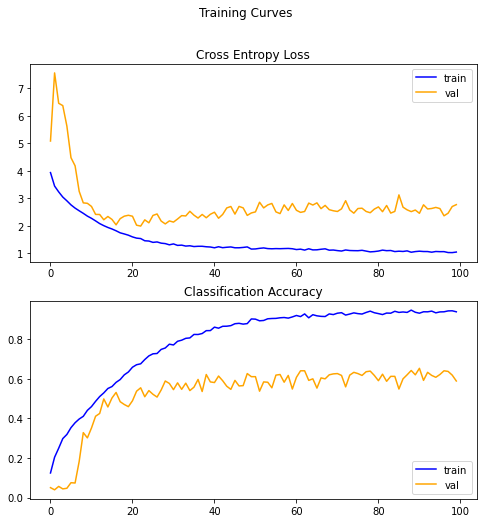

In [ ]:
summarize_diagnostics(CUSTOM_MODEL_20_history)

Απενεργοποιώντας τα callbacks για EarlyStopping, παρατηρούμε πως το μοντέλο παρουσιάζει τεράστιο overfitting, παρά τις προσπάθειές μας να αντιμετωπίσουμε κάτι τέτοια εισάγοντας τα κατάλληλα επίπεδα κατά την κατασκευή του. Επιπλέον, από την 20η περίπου εποχή και έπειτα τα αποτελέσματα στο validation set όσον αφορά loss και accuracy φαίνεται να έχουν παγιωθεί και να ταλαντώνονται χωρίς ουσιαστική βελτίωση.

**Αποτελέσματα για 40 κλάσεις**

In [ ]:
CUSTOM_MODEL_40 = init_custom_model(summary = True)
CUSTOM_MODEL_40_history = train_model(CUSTOM_MODEL_40, 200, 66, 5, False)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0

66/66 [==============================] - 2s 24ms/step - loss: 2.3316 - accuracy: 0.4577 - val_loss: 2.5932 - val_accuracy: 0.4469
Epoch 22/200
66/66 [==============================] - 1s 23ms/step - loss: 2.3124 - accuracy: 0.4711 - val_loss: 2.5427 - val_accuracy: 0.4109
Epoch 23/200
66/66 [==============================] - 1s 22ms/step - loss: 2.2200 - accuracy: 0.4856 - val_loss: 2.2433 - val_accuracy: 0.4828
Epoch 24/200
66/66 [==============================] - 1s 23ms/step - loss: 2.1957 - accuracy: 0.4923 - val_loss: 2.5509 - val_accuracy: 0.4062
Epoch 25/200
66/66 [==============================] - 1s 21ms/step - loss: 2.1143 - accuracy: 0.5180 - val_loss: 2.7125 - val_accuracy: 0.3859
Epoch 26/200
66/66 [==============================] - 1s 22ms/step - loss: 2.1641 - accuracy: 0.5064 - val_loss: 2.5810 - val_accuracy: 0.4453
Epoch 27/200
66/66 [==============================] - 1s 22ms/step - loss: 2.0643 - accuracy: 0.5318 - val_loss: 2.3999 - val_accuracy: 0.4875
Epoch 28/200

66/66 [==============================] - 1s 22ms/step - loss: 1.6031 - accuracy: 0.8041 - val_loss: 2.5532 - val_accuracy: 0.5859
Epoch 79/200
66/66 [==============================] - 1s 21ms/step - loss: 1.5920 - accuracy: 0.8069 - val_loss: 2.6053 - val_accuracy: 0.6016
Epoch 80/200
66/66 [==============================] - 1s 22ms/step - loss: 1.5368 - accuracy: 0.8207 - val_loss: 2.5233 - val_accuracy: 0.6172
Epoch 81/200
66/66 [==============================] - 1s 23ms/step - loss: 1.5841 - accuracy: 0.8091 - val_loss: 2.5205 - val_accuracy: 0.6141
Epoch 82/200
66/66 [==============================] - 1s 21ms/step - loss: 1.5751 - accuracy: 0.8113 - val_loss: 2.8112 - val_accuracy: 0.5766
Epoch 83/200
66/66 [==============================] - 1s 21ms/step - loss: 1.5541 - accuracy: 0.8195 - val_loss: 2.7878 - val_accuracy: 0.5844
Epoch 84/200
66/66 [==============================] - 1s 22ms/step - loss: 1.5856 - accuracy: 0.8145 - val_loss: 2.5400 - val_accuracy: 0.6219
Epoch 85/200

66/66 [==============================] - 1s 21ms/step - loss: 1.4604 - accuracy: 0.8688 - val_loss: 2.7001 - val_accuracy: 0.6266
Epoch 136/200
66/66 [==============================] - 1s 21ms/step - loss: 1.3729 - accuracy: 0.8920 - val_loss: 2.5615 - val_accuracy: 0.6578
Epoch 137/200
66/66 [==============================] - 1s 21ms/step - loss: 1.4220 - accuracy: 0.8757 - val_loss: 2.7201 - val_accuracy: 0.6172
Epoch 138/200
66/66 [==============================] - 1s 21ms/step - loss: 1.3961 - accuracy: 0.8834 - val_loss: 2.5969 - val_accuracy: 0.6547
Epoch 139/200
66/66 [==============================] - 1s 21ms/step - loss: 1.4322 - accuracy: 0.8735 - val_loss: 2.6778 - val_accuracy: 0.6156
Epoch 140/200
66/66 [==============================] - 1s 22ms/step - loss: 1.3925 - accuracy: 0.8857 - val_loss: 2.5024 - val_accuracy: 0.6594
Epoch 141/200
66/66 [==============================] - 2s 27ms/step - loss: 1.4406 - accuracy: 0.8714 - val_loss: 2.6356 - val_accuracy: 0.6328
Epoch 

Epoch 192/200
66/66 [==============================] - 1s 21ms/step - loss: 1.3303 - accuracy: 0.9049 - val_loss: 2.5759 - val_accuracy: 0.6609
Epoch 193/200
66/66 [==============================] - 1s 21ms/step - loss: 1.3565 - accuracy: 0.8956 - val_loss: 2.5278 - val_accuracy: 0.6750
Epoch 194/200
66/66 [==============================] - 1s 22ms/step - loss: 1.3701 - accuracy: 0.8920 - val_loss: 2.5895 - val_accuracy: 0.6531
Epoch 195/200
66/66 [==============================] - 1s 22ms/step - loss: 1.3615 - accuracy: 0.8960 - val_loss: 2.5556 - val_accuracy: 0.6531
Epoch 196/200
66/66 [==============================] - 1s 21ms/step - loss: 1.3354 - accuracy: 0.8990 - val_loss: 2.5563 - val_accuracy: 0.6609
Epoch 197/200
66/66 [==============================] - 1s 23ms/step - loss: 1.3521 - accuracy: 0.8978 - val_loss: 2.4994 - val_accuracy: 0.6766
Epoch 198/200
66/66 [==============================] - 1s 22ms/step - loss: 1.3197 - accuracy: 0.9051 - val_loss: 2.6401 - val_accuracy:

In [ ]:
CUSTOM_MODEL_40_loss, CUSTOM_MODEL_40_acc = CUSTOM_MODEL_40.evaluate(x_test, map_label(y_test))

125/125 [==============================] - 1s 4ms/step - loss: 2.6484 - accuracy: 0.6460


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

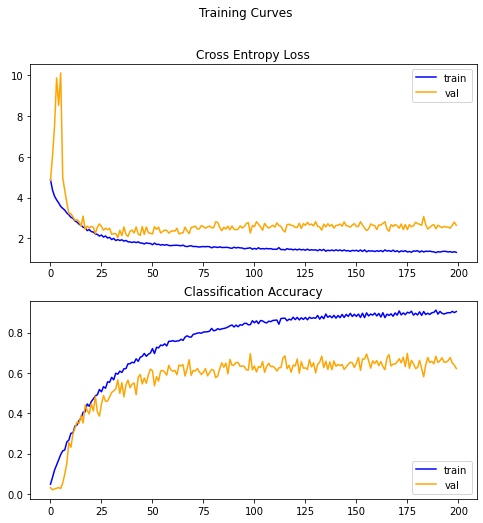

In [ ]:
summarize_diagnostics(CUSTOM_MODEL_40_history)

Όπως φαίνεται από τις γραφικές το δίκτυο και για τις 40 κλάσεις παρουσιάζει αρκετό overfitting, χωρίς ουσιαστικές αλλαγές στα αποτελέσματα στο validation set μετά το πέρας της εποχής 50. Το **παράδοξο** της υπόθεσης είναι πως για το πρόβλημα των 40 κλάσεων το οποίο είναι πιο δύσκολο από αυτό των 20 καταλήγουμε σε καλύτερα αποτελέσμαρα όσον αφορά το accuracy και το loss.

Και εδώ παρουσιάζονται τα αποτελέσματα με χρήση EarlyStopping με patience 30 εποχές.

In [ ]:
CUSTOM_MODEL_40 = init_custom_model(summary = True)
CUSTOM_MODEL_40_history = train_model(CUSTOM_MODEL_40, 400, 66, 5, True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)       

66/66 [==============================] - 1s 23ms/step - loss: 2.3214 - accuracy: 0.4555 - val_loss: 2.9755 - val_accuracy: 0.3313
Epoch 22/400
66/66 [==============================] - 1s 21ms/step - loss: 2.3429 - accuracy: 0.4502 - val_loss: 2.5298 - val_accuracy: 0.4141
Epoch 23/400
66/66 [==============================] - 1s 21ms/step - loss: 2.2088 - accuracy: 0.4873 - val_loss: 2.3379 - val_accuracy: 0.4516
Epoch 24/400
66/66 [==============================] - 1s 23ms/step - loss: 2.2637 - accuracy: 0.4785 - val_loss: 2.4374 - val_accuracy: 0.4859
Epoch 25/400
66/66 [==============================] - 1s 21ms/step - loss: 2.1548 - accuracy: 0.5037 - val_loss: 2.3348 - val_accuracy: 0.4875
Epoch 26/400
66/66 [==============================] - 1s 21ms/step - loss: 2.1763 - accuracy: 0.5049 - val_loss: 2.4511 - val_accuracy: 0.4422
Epoch 27/400
66/66 [==============================] - 1s 22ms/step - loss: 2.0782 - accuracy: 0.5232 - val_loss: 2.2989 - val_accuracy: 0.4828
Epoch 28/400

66/66 [==============================] - 1s 21ms/step - loss: 1.6020 - accuracy: 0.8058 - val_loss: 2.3660 - val_accuracy: 0.6609
Epoch 79/400
66/66 [==============================] - 1s 21ms/step - loss: 1.5934 - accuracy: 0.8132 - val_loss: 2.4394 - val_accuracy: 0.6578
Epoch 80/400
66/66 [==============================] - 1s 22ms/step - loss: 1.5569 - accuracy: 0.8220 - val_loss: 2.7917 - val_accuracy: 0.5891
Epoch 81/400
66/66 [==============================] - 1s 23ms/step - loss: 1.5363 - accuracy: 0.8259 - val_loss: 2.4418 - val_accuracy: 0.6391
Epoch 82/400
66/66 [==============================] - 1s 21ms/step - loss: 1.5620 - accuracy: 0.8215 - val_loss: 2.3992 - val_accuracy: 0.6250
Epoch 83/400
66/66 [==============================] - 1s 22ms/step - loss: 1.5684 - accuracy: 0.8209 - val_loss: 2.5406 - val_accuracy: 0.6109
Epoch 84/400
66/66 [==============================] - 1s 21ms/step - loss: 1.5638 - accuracy: 0.8260 - val_loss: 2.4683 - val_accuracy: 0.6453
Epoch 85/400

66/66 [==============================] - 1s 21ms/step - loss: 1.4596 - accuracy: 0.8737 - val_loss: 2.7313 - val_accuracy: 0.6500
Epoch 136/400
66/66 [==============================] - 1s 21ms/step - loss: 1.4195 - accuracy: 0.8828 - val_loss: 2.8550 - val_accuracy: 0.6047
Epoch 137/400
66/66 [==============================] - 1s 21ms/step - loss: 1.4326 - accuracy: 0.8802 - val_loss: 2.7579 - val_accuracy: 0.6250
Epoch 138/400
66/66 [==============================] - 2s 23ms/step - loss: 1.3936 - accuracy: 0.8890 - val_loss: 2.5379 - val_accuracy: 0.6609
Epoch 139/400
66/66 [==============================] - 1s 21ms/step - loss: 1.4186 - accuracy: 0.8820 - val_loss: 2.7722 - val_accuracy: 0.5953
Epoch 140/400
66/66 [==============================] - 1s 22ms/step - loss: 1.3487 - accuracy: 0.8989 - val_loss: 2.6630 - val_accuracy: 0.6313
Epoch 141/400
66/66 [==============================] - 1s 21ms/step - loss: 1.4446 - accuracy: 0.8711 - val_loss: 2.8632 - val_accuracy: 0.6203
Epoch 

In [ ]:
CUSTOM_MODEL_40_loss, CUSTOM_MODEL_40_acc = CUSTOM_MODEL_40.evaluate(x_test, map_label(y_test))

125/125 [==============================] - 1s 4ms/step - loss: 2.4579 - accuracy: 0.6575


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

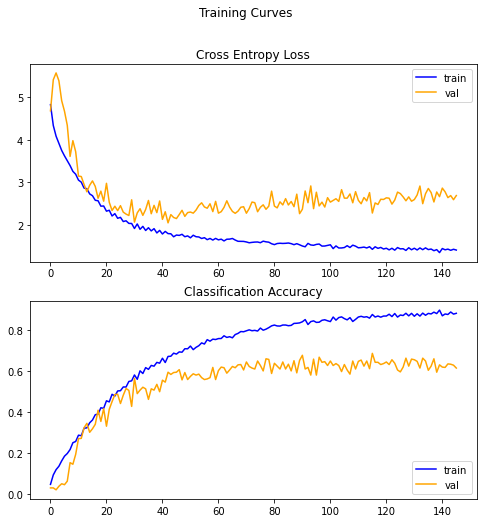

In [ ]:
summarize_diagnostics(CUSTOM_MODEL_40_history)

H παραδόξως καλή συμπεριφορά του δικτύου συνεχίζεται και με EarlyStopping, όπου σταματάει σε μικρότερο αριθμό εποχών συγκριτικά με το πρόβλημα των 20 κλάσεων (146 από 154) πετυχαίνοντας μεγαλύτερο accuracy στο test set (65.75%). Παρ'όλα αυτά το overfitting είναι αισθητό και θα δούμε κατά πόσο μπορούμε να το καταπολεμήσουμε με Data Augmentation.

**Αποτελέσματα για 60 κλάσεις**

In [ ]:
CUSTOM_MODEL_60 = init_custom_model(summary = True)
CUSTOM_MODEL_60_history = train_model(CUSTOM_MODEL_60, 200, 66, 5, False)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0

66/66 [==============================] - 2s 24ms/step - loss: 3.1347 - accuracy: 0.2543 - val_loss: 3.2420 - val_accuracy: 0.2453
Epoch 22/200
66/66 [==============================] - 1s 22ms/step - loss: 3.0612 - accuracy: 0.2708 - val_loss: 3.2862 - val_accuracy: 0.2422
Epoch 23/200
66/66 [==============================] - 2s 23ms/step - loss: 2.9814 - accuracy: 0.2874 - val_loss: 3.1824 - val_accuracy: 0.2562
Epoch 24/200
66/66 [==============================] - 1s 23ms/step - loss: 2.9765 - accuracy: 0.2862 - val_loss: 3.0646 - val_accuracy: 0.2734
Epoch 25/200
66/66 [==============================] - 1s 22ms/step - loss: 2.9003 - accuracy: 0.3071 - val_loss: 3.0726 - val_accuracy: 0.2672
Epoch 26/200
66/66 [==============================] - 1s 22ms/step - loss: 2.8715 - accuracy: 0.3221 - val_loss: 3.0998 - val_accuracy: 0.2797
Epoch 27/200
66/66 [==============================] - 2s 24ms/step - loss: 2.8774 - accuracy: 0.3143 - val_loss: 3.2023 - val_accuracy: 0.2531
Epoch 28/200

66/66 [==============================] - 2s 23ms/step - loss: 2.1531 - accuracy: 0.5990 - val_loss: 2.5162 - val_accuracy: 0.5484
Epoch 79/200
66/66 [==============================] - 1s 22ms/step - loss: 2.1049 - accuracy: 0.6101 - val_loss: 2.6859 - val_accuracy: 0.5109
Epoch 80/200
66/66 [==============================] - 1s 23ms/step - loss: 2.0923 - accuracy: 0.6156 - val_loss: 2.5524 - val_accuracy: 0.5375
Epoch 81/200
66/66 [==============================] - 1s 22ms/step - loss: 2.1807 - accuracy: 0.6011 - val_loss: 2.6386 - val_accuracy: 0.5031
Epoch 82/200
66/66 [==============================] - 1s 23ms/step - loss: 2.1139 - accuracy: 0.6152 - val_loss: 2.6425 - val_accuracy: 0.4922
Epoch 83/200
66/66 [==============================] - 2s 24ms/step - loss: 2.0492 - accuracy: 0.6335 - val_loss: 2.7349 - val_accuracy: 0.5016
Epoch 84/200
66/66 [==============================] - 1s 23ms/step - loss: 2.1365 - accuracy: 0.6081 - val_loss: 2.7452 - val_accuracy: 0.5125
Epoch 85/200

66/66 [==============================] - 2s 23ms/step - loss: 1.9546 - accuracy: 0.7082 - val_loss: 2.7423 - val_accuracy: 0.5422
Epoch 136/200
66/66 [==============================] - 2s 25ms/step - loss: 1.9271 - accuracy: 0.7099 - val_loss: 2.6712 - val_accuracy: 0.5828
Epoch 137/200
66/66 [==============================] - 1s 23ms/step - loss: 1.8206 - accuracy: 0.7424 - val_loss: 2.9512 - val_accuracy: 0.5078
Epoch 138/200
66/66 [==============================] - 2s 25ms/step - loss: 1.9082 - accuracy: 0.7232 - val_loss: 2.7552 - val_accuracy: 0.5641
Epoch 139/200
66/66 [==============================] - 2s 24ms/step - loss: 1.9300 - accuracy: 0.7184 - val_loss: 2.7411 - val_accuracy: 0.5922
Epoch 140/200
66/66 [==============================] - 2s 23ms/step - loss: 1.7929 - accuracy: 0.7547 - val_loss: 2.7583 - val_accuracy: 0.5578
Epoch 141/200
66/66 [==============================] - 2s 24ms/step - loss: 1.8888 - accuracy: 0.7269 - val_loss: 2.8096 - val_accuracy: 0.5375
Epoch 

Epoch 192/200
66/66 [==============================] - 1s 23ms/step - loss: 1.7738 - accuracy: 0.7815 - val_loss: 2.7438 - val_accuracy: 0.5688
Epoch 193/200
66/66 [==============================] - 1s 23ms/step - loss: 1.8309 - accuracy: 0.7615 - val_loss: 2.8408 - val_accuracy: 0.5609
Epoch 194/200
66/66 [==============================] - 1s 22ms/step - loss: 1.7282 - accuracy: 0.7946 - val_loss: 2.9834 - val_accuracy: 0.5766
Epoch 195/200
66/66 [==============================] - 1s 23ms/step - loss: 1.7222 - accuracy: 0.7910 - val_loss: 2.6890 - val_accuracy: 0.6109
Epoch 196/200
66/66 [==============================] - 2s 24ms/step - loss: 1.8124 - accuracy: 0.7618 - val_loss: 2.7107 - val_accuracy: 0.6141
Epoch 197/200
66/66 [==============================] - 2s 25ms/step - loss: 1.7247 - accuracy: 0.7933 - val_loss: 3.0889 - val_accuracy: 0.5437
Epoch 198/200
66/66 [==============================] - 2s 23ms/step - loss: 1.6998 - accuracy: 0.7968 - val_loss: 2.7396 - val_accuracy:

In [ ]:
CUSTOM_MODEL_60_loss, CUSTOM_MODEL_60_acc = CUSTOM_MODEL_60.evaluate(x_test, map_label(y_test))

188/188 [==============================] - 1s 5ms/step - loss: 2.6597 - accuracy: 0.6060


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

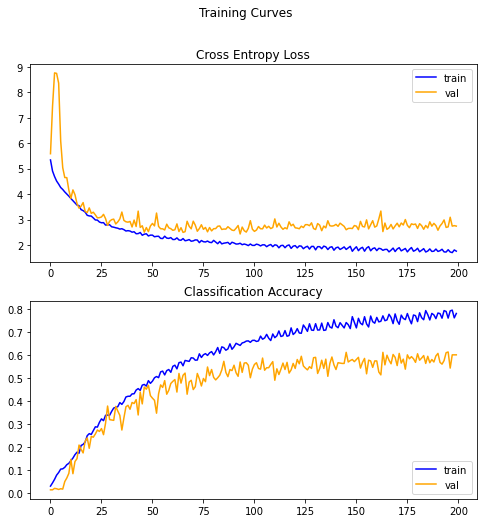

In [ ]:
summarize_diagnostics(CUSTOM_MODEL_60_history)

Παρατηρούμε πως το πρόβλημα ακολουθεί την ίδια λογική με τα προηγούμενα, όντας όμως λίγο πιο δύσκολο. Εμφανίζεται λοιπόν υπερεκπαίδευση η οποία μετά την 75η εποχή ξεκινά και γίνεται αισθητή.

Θα κάνουμε τώρα χρήση EarlyStopping.

In [ ]:
CUSTOM_MODEL_60 = init_custom_model(summary = True)
CUSTOM_MODEL_60_history = train_model(CUSTOM_MODEL_60, 400, 66, 5, True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 32)       

66/66 [==============================] - 2s 23ms/step - loss: 3.1428 - accuracy: 0.2553 - val_loss: 3.3611 - val_accuracy: 0.2562
Epoch 22/400
66/66 [==============================] - 2s 23ms/step - loss: 3.0649 - accuracy: 0.2776 - val_loss: 3.2939 - val_accuracy: 0.2406
Epoch 23/400
66/66 [==============================] - 2s 23ms/step - loss: 2.9980 - accuracy: 0.2910 - val_loss: 3.1047 - val_accuracy: 0.2906
Epoch 24/400
66/66 [==============================] - 2s 23ms/step - loss: 2.9848 - accuracy: 0.2855 - val_loss: 3.0779 - val_accuracy: 0.2688
Epoch 25/400
66/66 [==============================] - 1s 22ms/step - loss: 2.8887 - accuracy: 0.3139 - val_loss: 3.0249 - val_accuracy: 0.2812
Epoch 26/400
66/66 [==============================] - 1s 22ms/step - loss: 2.8754 - accuracy: 0.3098 - val_loss: 2.9793 - val_accuracy: 0.2937
Epoch 27/400
66/66 [==============================] - 2s 23ms/step - loss: 2.8859 - accuracy: 0.3158 - val_loss: 3.0590 - val_accuracy: 0.3063
Epoch 28/400

66/66 [==============================] - 2s 23ms/step - loss: 2.1341 - accuracy: 0.6147 - val_loss: 2.7119 - val_accuracy: 0.5094
Epoch 79/400
66/66 [==============================] - 2s 24ms/step - loss: 2.1156 - accuracy: 0.6218 - val_loss: 2.5654 - val_accuracy: 0.5359
Epoch 80/400
66/66 [==============================] - 1s 22ms/step - loss: 2.0786 - accuracy: 0.6304 - val_loss: 2.6305 - val_accuracy: 0.5203
Epoch 81/400
66/66 [==============================] - 1s 22ms/step - loss: 2.1285 - accuracy: 0.6191 - val_loss: 2.6233 - val_accuracy: 0.5297
Epoch 82/400
66/66 [==============================] - 2s 23ms/step - loss: 2.0774 - accuracy: 0.6338 - val_loss: 2.5509 - val_accuracy: 0.5328
Epoch 83/400
66/66 [==============================] - 2s 25ms/step - loss: 2.0350 - accuracy: 0.6448 - val_loss: 2.6668 - val_accuracy: 0.5219
Epoch 84/400
66/66 [==============================] - 1s 22ms/step - loss: 2.1080 - accuracy: 0.6262 - val_loss: 2.6801 - val_accuracy: 0.5156
Epoch 85/400

66/66 [==============================] - 1s 22ms/step - loss: 1.8861 - accuracy: 0.7275 - val_loss: 2.8119 - val_accuracy: 0.5688
Epoch 136/400
66/66 [==============================] - 2s 30ms/step - loss: 1.9091 - accuracy: 0.7298 - val_loss: 2.5962 - val_accuracy: 0.5906
Epoch 137/400
66/66 [==============================] - 1s 23ms/step - loss: 1.8106 - accuracy: 0.7536 - val_loss: 2.6760 - val_accuracy: 0.6016
Epoch 138/400
66/66 [==============================] - 1s 23ms/step - loss: 1.8991 - accuracy: 0.7353 - val_loss: 2.8583 - val_accuracy: 0.5391
Epoch 139/400
66/66 [==============================] - 2s 24ms/step - loss: 1.9349 - accuracy: 0.7210 - val_loss: 2.7182 - val_accuracy: 0.5703
Epoch 140/400
66/66 [==============================] - 2s 23ms/step - loss: 1.8070 - accuracy: 0.7588 - val_loss: 2.7283 - val_accuracy: 0.5969
Epoch 141/400
66/66 [==============================] - 1s 22ms/step - loss: 1.8916 - accuracy: 0.7351 - val_loss: 2.8078 - val_accuracy: 0.5672
Epoch 

Epoch 192/400
66/66 [==============================] - 1s 22ms/step - loss: 1.7991 - accuracy: 0.7812 - val_loss: 2.8616 - val_accuracy: 0.5875
Epoch 193/400
66/66 [==============================] - 2s 24ms/step - loss: 1.8768 - accuracy: 0.7584 - val_loss: 2.9059 - val_accuracy: 0.5844
Epoch 194/400
66/66 [==============================] - 1s 23ms/step - loss: 1.7546 - accuracy: 0.7949 - val_loss: 2.8607 - val_accuracy: 0.5703
Epoch 195/400
66/66 [==============================] - 1s 22ms/step - loss: 1.7652 - accuracy: 0.7912 - val_loss: 2.7810 - val_accuracy: 0.5828
Epoch 196/400
66/66 [==============================] - 2s 23ms/step - loss: 1.7954 - accuracy: 0.7863 - val_loss: 2.7667 - val_accuracy: 0.5766
Epoch 197/400
66/66 [==============================] - 2s 23ms/step - loss: 1.7496 - accuracy: 0.7973 - val_loss: 2.7604 - val_accuracy: 0.5969
Epoch 198/400
66/66 [==============================] - 2s 26ms/step - loss: 1.8066 - accuracy: 0.7829 - val_loss: 2.7704 - val_accuracy:

In [ ]:
CUSTOM_MODEL_60_loss, CUSTOM_MODEL_60_acc = CUSTOM_MODEL_60.evaluate(x_test, map_label(y_test))

188/188 [==============================] - 1s 5ms/step - loss: 2.7662 - accuracy: 0.5923


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

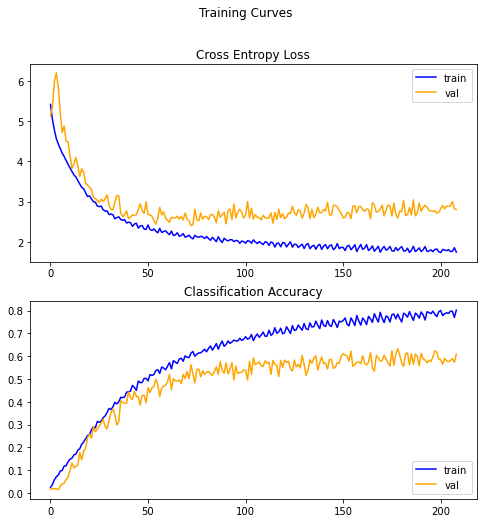

In [ ]:
summarize_diagnostics(CUSTOM_MODEL_60_history)

Παρατηρούμε πως και σε αυτό το πρόβλημα πετυχαίνουμε accuracy της τάξης του 60% στο test set. Επίσης η ένταση του overfitting μειώνεται με την αύξηση της δυσκολίας του προβλήματος, εξακολουθεί όμως να είναι μεγάλη (80% accuracy in training - 60% in testing). 

**Αποτελέσματα για 80 κλάσεις**

In [ ]:
CUSTOM_MODEL_80 = init_custom_model(summary = True)
CUSTOM_MODEL_80_history = train_model(CUSTOM_MODEL_80, 250, 66, 5, False)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0

66/66 [==============================] - 2s 27ms/step - loss: 3.3081 - accuracy: 0.2198 - val_loss: 3.4937 - val_accuracy: 0.1969
Epoch 22/250
66/66 [==============================] - 2s 25ms/step - loss: 3.2779 - accuracy: 0.2286 - val_loss: 3.6156 - val_accuracy: 0.1906
Epoch 23/250
66/66 [==============================] - 2s 24ms/step - loss: 3.2326 - accuracy: 0.2460 - val_loss: 3.5437 - val_accuracy: 0.2172
Epoch 24/250
66/66 [==============================] - 2s 26ms/step - loss: 3.1772 - accuracy: 0.2564 - val_loss: 3.2622 - val_accuracy: 0.2641
Epoch 25/250
66/66 [==============================] - 2s 23ms/step - loss: 3.0851 - accuracy: 0.2636 - val_loss: 3.7070 - val_accuracy: 0.1688
Epoch 26/250
66/66 [==============================] - 2s 25ms/step - loss: 3.0993 - accuracy: 0.2643 - val_loss: 3.1717 - val_accuracy: 0.2937
Epoch 27/250
66/66 [==============================] - 2s 28ms/step - loss: 3.1052 - accuracy: 0.2678 - val_loss: 3.0982 - val_accuracy: 0.2625
Epoch 28/250

66/66 [==============================] - 2s 24ms/step - loss: 2.3651 - accuracy: 0.5114 - val_loss: 2.8326 - val_accuracy: 0.4250
Epoch 79/250
66/66 [==============================] - 2s 28ms/step - loss: 2.4055 - accuracy: 0.5014 - val_loss: 2.6768 - val_accuracy: 0.4359
Epoch 80/250
66/66 [==============================] - 2s 24ms/step - loss: 2.4180 - accuracy: 0.5070 - val_loss: 2.7391 - val_accuracy: 0.4516
Epoch 81/250
66/66 [==============================] - 2s 23ms/step - loss: 2.3558 - accuracy: 0.5183 - val_loss: 2.6769 - val_accuracy: 0.4547
Epoch 82/250
66/66 [==============================] - 2s 23ms/step - loss: 2.3791 - accuracy: 0.5138 - val_loss: 2.7420 - val_accuracy: 0.4391
Epoch 83/250
66/66 [==============================] - 2s 24ms/step - loss: 2.3877 - accuracy: 0.5230 - val_loss: 2.7161 - val_accuracy: 0.4812
Epoch 84/250
66/66 [==============================] - 2s 24ms/step - loss: 2.4030 - accuracy: 0.5224 - val_loss: 2.8356 - val_accuracy: 0.4313
Epoch 85/250

66/66 [==============================] - 2s 24ms/step - loss: 2.1450 - accuracy: 0.6123 - val_loss: 2.6043 - val_accuracy: 0.5328
Epoch 136/250
66/66 [==============================] - 2s 26ms/step - loss: 2.2036 - accuracy: 0.6067 - val_loss: 2.6543 - val_accuracy: 0.5250
Epoch 137/250
66/66 [==============================] - 2s 24ms/step - loss: 2.2160 - accuracy: 0.5972 - val_loss: 2.6763 - val_accuracy: 0.5031
Epoch 138/250
66/66 [==============================] - 2s 24ms/step - loss: 2.1558 - accuracy: 0.6109 - val_loss: 2.5367 - val_accuracy: 0.5266
Epoch 139/250
66/66 [==============================] - 2s 25ms/step - loss: 2.1949 - accuracy: 0.6054 - val_loss: 2.7788 - val_accuracy: 0.5109
Epoch 140/250
66/66 [==============================] - 2s 24ms/step - loss: 2.2057 - accuracy: 0.6104 - val_loss: 2.6477 - val_accuracy: 0.4922
Epoch 141/250
66/66 [==============================] - 2s 27ms/step - loss: 2.1812 - accuracy: 0.6127 - val_loss: 2.6125 - val_accuracy: 0.5078
Epoch 

Epoch 192/250
66/66 [==============================] - 2s 25ms/step - loss: 2.1223 - accuracy: 0.6504 - val_loss: 2.5773 - val_accuracy: 0.5578
Epoch 193/250
66/66 [==============================] - 2s 23ms/step - loss: 2.1510 - accuracy: 0.6415 - val_loss: 2.6872 - val_accuracy: 0.5453
Epoch 194/250
66/66 [==============================] - 2s 23ms/step - loss: 2.0523 - accuracy: 0.6679 - val_loss: 2.6855 - val_accuracy: 0.5531
Epoch 195/250
66/66 [==============================] - 2s 24ms/step - loss: 2.0339 - accuracy: 0.6697 - val_loss: 2.7562 - val_accuracy: 0.5328
Epoch 196/250
66/66 [==============================] - 2s 23ms/step - loss: 2.0874 - accuracy: 0.6602 - val_loss: 2.6451 - val_accuracy: 0.5641
Epoch 197/250
66/66 [==============================] - 2s 27ms/step - loss: 2.1234 - accuracy: 0.6559 - val_loss: 2.6475 - val_accuracy: 0.5437
Epoch 198/250
66/66 [==============================] - 2s 27ms/step - loss: 2.0034 - accuracy: 0.6804 - val_loss: 2.9004 - val_accuracy:

Epoch 249/250
66/66 [==============================] - 2s 23ms/step - loss: 2.0472 - accuracy: 0.6855 - val_loss: 2.5907 - val_accuracy: 0.5750
Epoch 250/250
66/66 [==============================] - 2s 24ms/step - loss: 1.9898 - accuracy: 0.6990 - val_loss: 2.5334 - val_accuracy: 0.5891


In [ ]:
CUSTOM_MODEL_80_loss, CUSTOM_MODEL_80_acc = CUSTOM_MODEL_80.evaluate(x_test, map_label(y_test))

250/250 [==============================] - 1s 4ms/step - loss: 2.6382 - accuracy: 0.5635


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

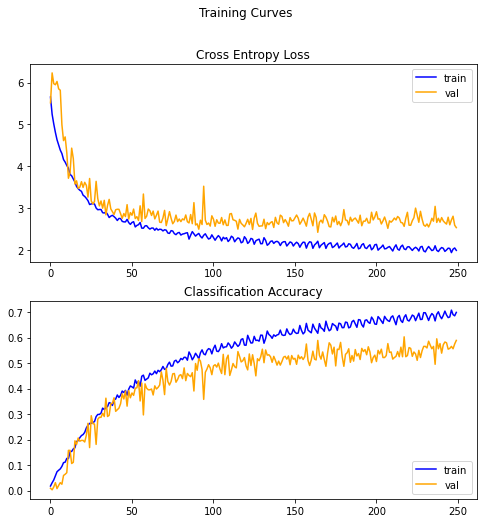

In [ ]:
summarize_diagnostics(CUSTOM_MODEL_80_history)

Παρατηρούμε πως στο πρόβλημα των 80 κλάσεων έχει μειωθεί αρκετά το overfitting, παρουσιάζεται βέβαια ακόμα. Επιπλέον παρά τη δυσκολία του πετυχαίνουμε 56% accuracy στο test set το οποίο είναι ικανοποιητικό.

In [ ]:
CUSTOM_MODEL_80 = init_custom_model(summary = True)
CUSTOM_MODEL_80_history = train_model(CUSTOM_MODEL_80, 400, 66, 5, True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)       

66/66 [==============================] - 2s 24ms/step - loss: 3.3510 - accuracy: 0.2158 - val_loss: 3.5739 - val_accuracy: 0.2078
Epoch 22/400
66/66 [==============================] - 2s 24ms/step - loss: 3.3150 - accuracy: 0.2410 - val_loss: 3.4142 - val_accuracy: 0.2391
Epoch 23/400
66/66 [==============================] - 2s 27ms/step - loss: 3.2931 - accuracy: 0.2313 - val_loss: 3.3985 - val_accuracy: 0.2266
Epoch 24/400
66/66 [==============================] - 2s 24ms/step - loss: 3.2756 - accuracy: 0.2390 - val_loss: 3.6123 - val_accuracy: 0.1828
Epoch 25/400
66/66 [==============================] - 2s 27ms/step - loss: 3.1697 - accuracy: 0.2571 - val_loss: 3.5257 - val_accuracy: 0.2344
Epoch 26/400
66/66 [==============================] - 2s 25ms/step - loss: 3.1539 - accuracy: 0.2603 - val_loss: 3.2494 - val_accuracy: 0.2609
Epoch 27/400
66/66 [==============================] - 2s 23ms/step - loss: 3.1353 - accuracy: 0.2610 - val_loss: 3.2950 - val_accuracy: 0.2469
Epoch 28/400

66/66 [==============================] - 2s 24ms/step - loss: 2.3556 - accuracy: 0.5050 - val_loss: 2.9950 - val_accuracy: 0.3953
Epoch 79/400
66/66 [==============================] - 2s 29ms/step - loss: 2.4312 - accuracy: 0.4949 - val_loss: 2.5483 - val_accuracy: 0.4750
Epoch 80/400
66/66 [==============================] - 2s 24ms/step - loss: 2.4738 - accuracy: 0.4879 - val_loss: 2.6164 - val_accuracy: 0.4484
Epoch 81/400
66/66 [==============================] - 2s 23ms/step - loss: 2.3507 - accuracy: 0.5138 - val_loss: 2.6873 - val_accuracy: 0.4359
Epoch 82/400
66/66 [==============================] - 2s 24ms/step - loss: 2.3522 - accuracy: 0.5112 - val_loss: 2.7782 - val_accuracy: 0.4219
Epoch 83/400
66/66 [==============================] - 2s 25ms/step - loss: 2.3919 - accuracy: 0.5051 - val_loss: 2.5967 - val_accuracy: 0.4859
Epoch 84/400
66/66 [==============================] - 2s 24ms/step - loss: 2.4550 - accuracy: 0.5008 - val_loss: 2.9728 - val_accuracy: 0.4156
Epoch 85/400

66/66 [==============================] - 2s 23ms/step - loss: 2.1815 - accuracy: 0.6050 - val_loss: 2.7974 - val_accuracy: 0.4859
Epoch 136/400
66/66 [==============================] - 2s 25ms/step - loss: 2.2404 - accuracy: 0.5951 - val_loss: 2.6877 - val_accuracy: 0.5297
Epoch 137/400
66/66 [==============================] - 2s 24ms/step - loss: 2.2391 - accuracy: 0.5920 - val_loss: 2.5986 - val_accuracy: 0.5125
Epoch 138/400
66/66 [==============================] - 2s 24ms/step - loss: 2.0735 - accuracy: 0.6341 - val_loss: 2.6431 - val_accuracy: 0.5078
Epoch 139/400
66/66 [==============================] - 2s 24ms/step - loss: 2.1599 - accuracy: 0.6179 - val_loss: 2.6531 - val_accuracy: 0.5312
Epoch 140/400
66/66 [==============================] - 2s 25ms/step - loss: 2.1649 - accuracy: 0.6119 - val_loss: 2.7200 - val_accuracy: 0.4906
Epoch 141/400
66/66 [==============================] - 2s 24ms/step - loss: 2.2269 - accuracy: 0.5919 - val_loss: 2.7713 - val_accuracy: 0.4906
Epoch 

Epoch 192/400
66/66 [==============================] - 2s 25ms/step - loss: 2.0866 - accuracy: 0.6585 - val_loss: 2.7373 - val_accuracy: 0.5297
Epoch 193/400
66/66 [==============================] - 2s 23ms/step - loss: 2.0894 - accuracy: 0.6507 - val_loss: 2.6550 - val_accuracy: 0.5281
Epoch 194/400
66/66 [==============================] - 2s 25ms/step - loss: 2.0374 - accuracy: 0.6661 - val_loss: 2.5351 - val_accuracy: 0.5922
Epoch 195/400
66/66 [==============================] - 2s 23ms/step - loss: 2.0714 - accuracy: 0.6621 - val_loss: 2.7542 - val_accuracy: 0.5562
Epoch 196/400
66/66 [==============================] - 2s 23ms/step - loss: 2.1041 - accuracy: 0.6522 - val_loss: 2.6771 - val_accuracy: 0.5484
Epoch 197/400
66/66 [==============================] - 2s 24ms/step - loss: 2.1322 - accuracy: 0.6490 - val_loss: 2.7103 - val_accuracy: 0.5500
Epoch 198/400
66/66 [==============================] - 2s 23ms/step - loss: 2.0341 - accuracy: 0.6671 - val_loss: 2.6976 - val_accuracy:

In [ ]:
CUSTOM_MODEL_80_loss, CUSTOM_MODEL_80_acc = CUSTOM_MODEL_80.evaluate(x_test, map_label(y_test))

250/250 [==============================] - 1s 4ms/step - loss: 2.6645 - accuracy: 0.5505


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

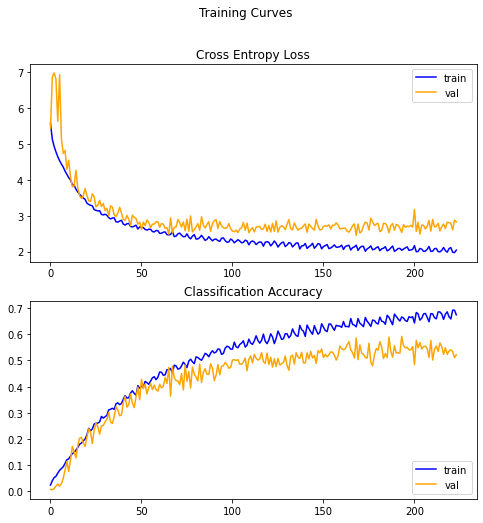

In [ ]:
summarize_diagnostics(CUSTOM_MODEL_80_history)

Επιπλέον, κάνοντας χρήση EarlyStopping παρατηρούμε πως γα τις 80 κλάσεις έχει αυξηθεί αρκετά ο αριθμός των εποχών που απαιτούνται πριν γίνει διακοπή σε 242 εποχές.

#### Adding Data Augmentation 

Παρακάτω παρουσιάζονται διάφορες συστοιχίες από προεπεξεργασία που δοκιμάσαμε για επάυξηση δεδομένων. Επιλέξαμε να εισάγουμε τα επίπεδα αυτά στο δίκτυό μας με σκοπό να επωφεληθούμε από τη χρήση της GPU, όπως αναφερόταν και στο documentation του tensorflow.

In [ ]:
IMG_SHAPE = x_train_ds[1].shape

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(10),
  tf.keras.layers.experimental.preprocessing.RandomZoom(.2, .2)
])


data_augmentation1 = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomRotation(1)])
    
data_augmentation2 = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomContrast(0.6),
  tf.keras.layers.experimental.preprocessing.RandomRotation(5)])

data_augmentation3 = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.1),
])

data_augmentation4 = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.1),  
    layers.experimental.preprocessing.RandomZoom(.2, .2),
    layers.experimental.preprocessing.RandomContrast(0.2),
])

In [ ]:
L2_DECAY_RATE = 0.0005

def init_custom_aug_model(summary):    
    model = models.Sequential()
    
    model.add(data_augmentation3)
    
    model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    #model.add(layers.Conv2D(64, kernel_size=(3, 3),activation='elu', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv2D(64, kernel_size=(3, 3),  padding='same',activation='relu',kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    #model.add(layers.Conv2D(128, kernel_size=(2, 2),activation='elu', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv2D(128, kernel_size=(3, 3),  padding='same',activation='relu',kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    model.add(layers.Conv2D(128, kernel_size=(3, 3),  padding='same', activation='relu',kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    #model.add(layers.Conv2D(256, kernel_size=(2, 2), padding='same', activation='relu', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Conv2D(256, kernel_size=(3, 3),  padding='same',activation='relu',kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    model.add(layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    #model.add(layers.Conv2D(512, kernel_size=(2, 2), padding='same', activation='relu', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Conv2D(512, kernel_size=(3, 3),  padding='same',activation='relu',kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    model.add(layers.Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    #model.add(layers.Conv2D(1024, kernel_size=(2, 2), padding='same', activation='relu', kernel_regularizer=regularizers.l2(L2_DECAY_RATE)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.GlobalAveragePooling2D())
    
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    #model.add(layers.Dense(20, activation='softmax'))
    #model.add(layers.Dropout(0.25))
    model.add(layers.Dense(128, activation='relu'))
    #model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(80, activation='softmax'))
    
    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
    if summary: 
        model.summary()
    return model

In [ ]:
CUSTOM_MODEL_AUG = init_custom_aug_model(summary = False)
CUSTOM_MODEL_AUG_history = train_model(CUSTOM_MODEL_AUG, 500, 66, 5)

In [ ]:
CUSTOM_MODEL_AUG_loss, CUSTOM_MODEL_AUG_acc = CUSTOM_MODEL_AUG.evaluate(x_test, map_label(y_test))

In [ ]:
CUSTOM_MODEL_AUG = init_custom_aug_model(summary = False)
CUSTOM_MODEL_AUG_history = train_model(CUSTOM_MODEL_AUG, 250, 66, 5)

In [ ]:
CUSTOM_MODEL_AUG_loss, CUSTOM_MODEL_AUG_acc = CUSTOM_MODEL_AUG.evaluate(x_test, map_label(y_test))

In [ ]:
CUSTOM_MODEL_AUG = init_custom_aug_model(summary = False)
CUSTOM_MODEL_AUG_history = train_model(CUSTOM_MODEL_AUG, 400, 66, 5)

In [ ]:
CUSTOM_MODEL_AUG_loss, CUSTOM_MODEL_AUG_acc = CUSTOM_MODEL_AUG.evaluate(x_test, map_label(y_test))

In [ ]:
CUSTOM_MODEL_AUG = init_custom_aug_model(summary = False)
CUSTOM_MODEL_AUG_history = train_model(CUSTOM_MODEL_AUG, 400, 66, 5)

In [ ]:
CUSTOM_MODEL_AUG_loss, CUSTOM_MODEL_AUG_acc = CUSTOM_MODEL_AUG.evaluate(x_test, map_label(y_test))

In [ ]:
CUSTOM_MODEL_AUG = init_custom_aug_model(summary = False)
CUSTOM_MODEL_AUG_history = train_model(CUSTOM_MODEL_AUG, 400, 66, 5)

In [ ]:
CUSTOM_MODEL_AUG_loss, CUSTOM_MODEL_AUG_acc = CUSTOM_MODEL_AUG.evaluate(x_test, map_label(y_test))

**Αποτελέσματα για 20 κλάσεις**

In [ ]:
CUSTOM_MODEL_AUG_20 = init_custom_aug_model(summary = False)
CUSTOM_MODEL_AUG_20_history = train_model(CUSTOM_MODEL_AUG_20, 200, 66, 5, cb = False)

Epoch 1/200
66/66 [==============================] - 2s 26ms/step - loss: 4.5112 - accuracy: 0.0782 - val_loss: 4.0141 - val_accuracy: 0.0453
Epoch 2/200
66/66 [==============================] - 1s 21ms/step - loss: 3.8997 - accuracy: 0.1243 - val_loss: 6.0140 - val_accuracy: 0.0375
Epoch 3/200
66/66 [==============================] - 1s 22ms/step - loss: 3.6780 - accuracy: 0.1334 - val_loss: 7.5209 - val_accuracy: 0.0453
Epoch 4/200
66/66 [==============================] - 2s 24ms/step - loss: 3.5461 - accuracy: 0.1518 - val_loss: 7.5315 - val_accuracy: 0.0437
Epoch 5/200
66/66 [==============================] - 1s 22ms/step - loss: 3.4432 - accuracy: 0.1644 - val_loss: 7.4672 - val_accuracy: 0.0344
Epoch 6/200
66/66 [==============================] - 1s 21ms/step - loss: 3.3326 - accuracy: 0.1714 - val_loss: 6.6274 - val_accuracy: 0.0391
Epoch 7/200
66/66 [==============================] - 1s 22ms/step - loss: 3.2378 - accuracy: 0.1843 - val_loss: 6.5445 - val_accuracy: 0.0344
Epoch 

66/66 [==============================] - 1s 23ms/step - loss: 2.0025 - accuracy: 0.4440 - val_loss: 2.0050 - val_accuracy: 0.4344
Epoch 59/200
66/66 [==============================] - 1s 21ms/step - loss: 2.0181 - accuracy: 0.4328 - val_loss: 2.1296 - val_accuracy: 0.3953
Epoch 60/200
66/66 [==============================] - 1s 21ms/step - loss: 1.9775 - accuracy: 0.4429 - val_loss: 2.2047 - val_accuracy: 0.3812
Epoch 61/200
66/66 [==============================] - 1s 21ms/step - loss: 1.9409 - accuracy: 0.4527 - val_loss: 1.9661 - val_accuracy: 0.4453
Epoch 62/200
66/66 [==============================] - 1s 22ms/step - loss: 1.9861 - accuracy: 0.4418 - val_loss: 2.2322 - val_accuracy: 0.4125
Epoch 63/200
66/66 [==============================] - 1s 21ms/step - loss: 1.9327 - accuracy: 0.4633 - val_loss: 2.1732 - val_accuracy: 0.4109
Epoch 64/200
66/66 [==============================] - 1s 21ms/step - loss: 1.9452 - accuracy: 0.4550 - val_loss: 2.0503 - val_accuracy: 0.4359
Epoch 65/200

66/66 [==============================] - 1s 22ms/step - loss: 1.6545 - accuracy: 0.5698 - val_loss: 1.6387 - val_accuracy: 0.5688
Epoch 116/200
66/66 [==============================] - 2s 24ms/step - loss: 1.6446 - accuracy: 0.5670 - val_loss: 1.8000 - val_accuracy: 0.5469
Epoch 117/200
66/66 [==============================] - 1s 22ms/step - loss: 1.6640 - accuracy: 0.5681 - val_loss: 1.8964 - val_accuracy: 0.5141
Epoch 118/200
66/66 [==============================] - 1s 22ms/step - loss: 1.6535 - accuracy: 0.5612 - val_loss: 1.8550 - val_accuracy: 0.5234
Epoch 119/200
66/66 [==============================] - 2s 23ms/step - loss: 1.6235 - accuracy: 0.5808 - val_loss: 1.8937 - val_accuracy: 0.5063
Epoch 120/200
66/66 [==============================] - 1s 22ms/step - loss: 1.6456 - accuracy: 0.5741 - val_loss: 1.8611 - val_accuracy: 0.5109
Epoch 121/200
66/66 [==============================] - 1s 22ms/step - loss: 1.6590 - accuracy: 0.5761 - val_loss: 1.5553 - val_accuracy: 0.5828
Epoch 

Epoch 172/200
66/66 [==============================] - 1s 22ms/step - loss: 1.5215 - accuracy: 0.6235 - val_loss: 1.8831 - val_accuracy: 0.5516
Epoch 173/200
66/66 [==============================] - 1s 22ms/step - loss: 1.5231 - accuracy: 0.6170 - val_loss: 1.7325 - val_accuracy: 0.5813
Epoch 174/200
66/66 [==============================] - 1s 21ms/step - loss: 1.5324 - accuracy: 0.6129 - val_loss: 1.5284 - val_accuracy: 0.6266
Epoch 175/200
66/66 [==============================] - 1s 22ms/step - loss: 1.4899 - accuracy: 0.6241 - val_loss: 1.6838 - val_accuracy: 0.5703
Epoch 176/200
66/66 [==============================] - 1s 21ms/step - loss: 1.5148 - accuracy: 0.6205 - val_loss: 1.7541 - val_accuracy: 0.5625
Epoch 177/200
66/66 [==============================] - 1s 21ms/step - loss: 1.5120 - accuracy: 0.6249 - val_loss: 1.8535 - val_accuracy: 0.5688
Epoch 178/200
66/66 [==============================] - 1s 21ms/step - loss: 1.5034 - accuracy: 0.6256 - val_loss: 1.7431 - val_accuracy:

In [ ]:
CUSTOM_MODEL_AUG_20 = init_custom_aug_model(summary = False)
CUSTOM_MODEL_AUG_20_history = train_model(CUSTOM_MODEL_AUG_20, 400, 66, 5, cb = True)

Epoch 1/400
66/66 [==============================] - 2s 26ms/step - loss: 4.5805 - accuracy: 0.0670 - val_loss: 3.9769 - val_accuracy: 0.0609
Epoch 2/400
66/66 [==============================] - 1s 21ms/step - loss: 3.9489 - accuracy: 0.1071 - val_loss: 4.7418 - val_accuracy: 0.0375
Epoch 3/400
66/66 [==============================] - 1s 22ms/step - loss: 3.6989 - accuracy: 0.1296 - val_loss: 7.2379 - val_accuracy: 0.0406
Epoch 4/400
66/66 [==============================] - 1s 21ms/step - loss: 3.5656 - accuracy: 0.1431 - val_loss: 6.6314 - val_accuracy: 0.0484
Epoch 5/400
66/66 [==============================] - 1s 21ms/step - loss: 3.4325 - accuracy: 0.1593 - val_loss: 6.7649 - val_accuracy: 0.0437
Epoch 6/400
66/66 [==============================] - 1s 22ms/step - loss: 3.3552 - accuracy: 0.1738 - val_loss: 6.4095 - val_accuracy: 0.0734
Epoch 7/400
66/66 [==============================] - 1s 22ms/step - loss: 3.2556 - accuracy: 0.1798 - val_loss: 5.2707 - val_accuracy: 0.0641
Epoch 

66/66 [==============================] - 1s 21ms/step - loss: 1.9512 - accuracy: 0.4666 - val_loss: 2.0602 - val_accuracy: 0.4234
Epoch 59/400
66/66 [==============================] - 1s 22ms/step - loss: 1.9824 - accuracy: 0.4525 - val_loss: 2.2497 - val_accuracy: 0.3844
Epoch 60/400
66/66 [==============================] - 2s 23ms/step - loss: 1.9488 - accuracy: 0.4616 - val_loss: 2.0473 - val_accuracy: 0.4172
Epoch 61/400
66/66 [==============================] - 1s 21ms/step - loss: 1.9354 - accuracy: 0.4685 - val_loss: 2.0422 - val_accuracy: 0.4437
Epoch 62/400
66/66 [==============================] - 1s 21ms/step - loss: 1.9524 - accuracy: 0.4695 - val_loss: 2.0401 - val_accuracy: 0.4313
Epoch 63/400
66/66 [==============================] - 1s 21ms/step - loss: 1.9224 - accuracy: 0.4757 - val_loss: 2.3555 - val_accuracy: 0.3844
Epoch 64/400
66/66 [==============================] - 1s 21ms/step - loss: 1.9376 - accuracy: 0.4844 - val_loss: 2.1437 - val_accuracy: 0.4016
Epoch 65/400

66/66 [==============================] - 1s 21ms/step - loss: 1.6232 - accuracy: 0.5818 - val_loss: 1.7235 - val_accuracy: 0.5594
Epoch 116/400
66/66 [==============================] - 1s 21ms/step - loss: 1.6386 - accuracy: 0.5805 - val_loss: 2.1409 - val_accuracy: 0.4781
Epoch 117/400
66/66 [==============================] - 1s 22ms/step - loss: 1.6275 - accuracy: 0.5808 - val_loss: 1.8762 - val_accuracy: 0.5172
Epoch 118/400
66/66 [==============================] - 1s 21ms/step - loss: 1.6185 - accuracy: 0.5838 - val_loss: 1.7607 - val_accuracy: 0.5703
Epoch 119/400
66/66 [==============================] - 2s 23ms/step - loss: 1.6282 - accuracy: 0.5819 - val_loss: 1.6771 - val_accuracy: 0.5844
Epoch 120/400
66/66 [==============================] - 1s 22ms/step - loss: 1.6118 - accuracy: 0.5894 - val_loss: 1.9722 - val_accuracy: 0.4828
Epoch 121/400
66/66 [==============================] - 1s 21ms/step - loss: 1.6214 - accuracy: 0.5843 - val_loss: 1.9705 - val_accuracy: 0.5422
Epoch 

Epoch 172/400
66/66 [==============================] - 1s 21ms/step - loss: 1.5099 - accuracy: 0.6295 - val_loss: 1.8656 - val_accuracy: 0.5672
Epoch 173/400
66/66 [==============================] - 1s 21ms/step - loss: 1.4869 - accuracy: 0.6352 - val_loss: 1.7670 - val_accuracy: 0.5609
Epoch 174/400
66/66 [==============================] - 1s 22ms/step - loss: 1.4779 - accuracy: 0.6359 - val_loss: 1.6962 - val_accuracy: 0.5859
Epoch 175/400
66/66 [==============================] - 1s 21ms/step - loss: 1.4839 - accuracy: 0.6309 - val_loss: 1.8276 - val_accuracy: 0.5672
Epoch 176/400
66/66 [==============================] - 1s 21ms/step - loss: 1.4990 - accuracy: 0.6296 - val_loss: 2.1861 - val_accuracy: 0.4953
Epoch 177/400
66/66 [==============================] - 1s 21ms/step - loss: 1.5101 - accuracy: 0.6272 - val_loss: 1.6066 - val_accuracy: 0.6234
Epoch 178/400
66/66 [==============================] - 1s 21ms/step - loss: 1.4741 - accuracy: 0.6384 - val_loss: 1.5731 - val_accuracy:

Epoch 229/400
66/66 [==============================] - 1s 21ms/step - loss: 1.4274 - accuracy: 0.6589 - val_loss: 1.7678 - val_accuracy: 0.5906
Epoch 230/400
66/66 [==============================] - 1s 21ms/step - loss: 1.4317 - accuracy: 0.6567 - val_loss: 1.7223 - val_accuracy: 0.5953
Epoch 231/400
66/66 [==============================] - 2s 23ms/step - loss: 1.4444 - accuracy: 0.6607 - val_loss: 2.1371 - val_accuracy: 0.5297
Epoch 232/400
66/66 [==============================] - 1s 21ms/step - loss: 1.4381 - accuracy: 0.6612 - val_loss: 1.5251 - val_accuracy: 0.6156
Epoch 233/400
66/66 [==============================] - 1s 21ms/step - loss: 1.4586 - accuracy: 0.6516 - val_loss: 1.8443 - val_accuracy: 0.5859
Epoch 234/400
66/66 [==============================] - 1s 21ms/step - loss: 1.4101 - accuracy: 0.6649 - val_loss: 1.6271 - val_accuracy: 0.6062
Epoch 235/400
66/66 [==============================] - 1s 21ms/step - loss: 1.3990 - accuracy: 0.6655 - val_loss: 1.6580 - val_accuracy:

In [ ]:
CUSTOM_MODEL_AUG_20_loss, CUSTOM_MODEL_AUG_20_acc = CUSTOM_MODEL_AUG_20.evaluate(x_test, map_label(y_test))

63/63 [==============================] - 0s 5ms/step - loss: 1.6195 - accuracy: 0.6145


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

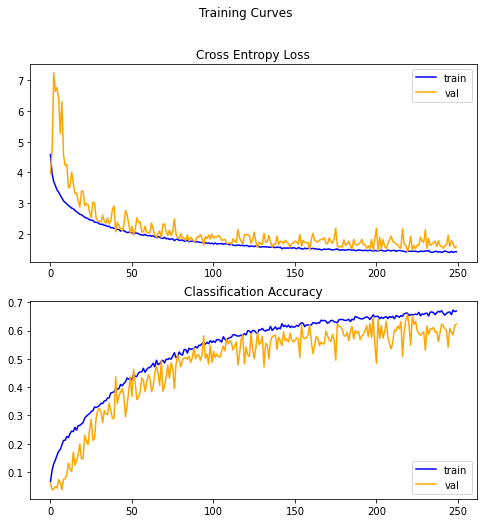

In [ ]:
summarize_diagnostics(CUSTOM_MODEL_AUG_20_history)

Παρατηρούμε πως με τη χρήση του data augmentation στο παράδειγμα με τις 20 κλάσεις καταφέρνουμε να εξαλείψουμε το overfitting, ενώ παράλληλα επιβραδύνθηκε και η διαδικασία της εκπαίδευσης, όπως αυτή αποτυπώνεται μέσα από τις εποχές που χρειάστηκαν έως το EarlyStopping σταματήσει την εκπαίδευση. Συγκεκριμένα χρειαστήκαμε 250 εποχές συγκριτικά με τις 154 που χρειάστηκαν χωρίς το data augmentation. Δυστυχώς, η χρήση data augmentation συνοδεύτηκε από μια μικρή μείωση στο accuracy στο test set από 63% σε 61%.

**Αποτελέσματα για 40 κλάσεις**

In [ ]:
CUSTOM_MODEL_AUG_40 = init_custom_aug_model(summary = False)
CUSTOM_MODEL_AUG_40_history = train_model(CUSTOM_MODEL_AUG_40, 250, 66, 5, cb = False)

Epoch 1/250
66/66 [==============================] - 2s 26ms/step - loss: 5.3793 - accuracy: 0.0335 - val_loss: 4.6195 - val_accuracy: 0.0250
Epoch 2/250
66/66 [==============================] - 1s 22ms/step - loss: 4.9029 - accuracy: 0.0417 - val_loss: 4.7041 - val_accuracy: 0.0188
Epoch 3/250
66/66 [==============================] - 1s 22ms/step - loss: 4.6879 - accuracy: 0.0522 - val_loss: 4.6888 - val_accuracy: 0.0203
Epoch 4/250
66/66 [==============================] - 2s 25ms/step - loss: 4.5208 - accuracy: 0.0529 - val_loss: 4.6762 - val_accuracy: 0.0281
Epoch 5/250
66/66 [==============================] - 1s 22ms/step - loss: 4.4248 - accuracy: 0.0591 - val_loss: 4.6095 - val_accuracy: 0.0531
Epoch 6/250
66/66 [==============================] - 1s 22ms/step - loss: 4.2879 - accuracy: 0.0685 - val_loss: 4.6434 - val_accuracy: 0.0391
Epoch 7/250
66/66 [==============================] - 1s 22ms/step - loss: 4.1787 - accuracy: 0.0792 - val_loss: 4.4482 - val_accuracy: 0.0391
Epoch 

66/66 [==============================] - 1s 22ms/step - loss: 2.8097 - accuracy: 0.2605 - val_loss: 2.8451 - val_accuracy: 0.2391
Epoch 59/250
66/66 [==============================] - 1s 22ms/step - loss: 2.8238 - accuracy: 0.2598 - val_loss: 2.8798 - val_accuracy: 0.2203
Epoch 60/250
66/66 [==============================] - 2s 23ms/step - loss: 2.7902 - accuracy: 0.2701 - val_loss: 3.4745 - val_accuracy: 0.1922
Epoch 61/250
66/66 [==============================] - 1s 22ms/step - loss: 2.7816 - accuracy: 0.2674 - val_loss: 2.9246 - val_accuracy: 0.2688
Epoch 62/250
66/66 [==============================] - 2s 24ms/step - loss: 2.7657 - accuracy: 0.2698 - val_loss: 2.7276 - val_accuracy: 0.2891
Epoch 63/250
66/66 [==============================] - 1s 22ms/step - loss: 2.7834 - accuracy: 0.2663 - val_loss: 2.8938 - val_accuracy: 0.2188
Epoch 64/250
66/66 [==============================] - 1s 22ms/step - loss: 2.7238 - accuracy: 0.2833 - val_loss: 2.6934 - val_accuracy: 0.3000
Epoch 65/250

66/66 [==============================] - 1s 22ms/step - loss: 2.3774 - accuracy: 0.3896 - val_loss: 2.3029 - val_accuracy: 0.4187
Epoch 116/250
66/66 [==============================] - 2s 23ms/step - loss: 2.4133 - accuracy: 0.3881 - val_loss: 2.5653 - val_accuracy: 0.3938
Epoch 117/250
66/66 [==============================] - 1s 22ms/step - loss: 2.3674 - accuracy: 0.4052 - val_loss: 2.1952 - val_accuracy: 0.4594
Epoch 118/250
66/66 [==============================] - 1s 23ms/step - loss: 2.3807 - accuracy: 0.3954 - val_loss: 2.1853 - val_accuracy: 0.4469
Epoch 119/250
66/66 [==============================] - 1s 22ms/step - loss: 2.3834 - accuracy: 0.3994 - val_loss: 2.4598 - val_accuracy: 0.3812
Epoch 120/250
66/66 [==============================] - 2s 24ms/step - loss: 2.3696 - accuracy: 0.4068 - val_loss: 2.3252 - val_accuracy: 0.4125
Epoch 121/250
66/66 [==============================] - 2s 23ms/step - loss: 2.3868 - accuracy: 0.3976 - val_loss: 2.2822 - val_accuracy: 0.4094
Epoch 

Epoch 172/250
66/66 [==============================] - 2s 24ms/step - loss: 2.2187 - accuracy: 0.4555 - val_loss: 2.4316 - val_accuracy: 0.4281
Epoch 173/250
66/66 [==============================] - 1s 22ms/step - loss: 2.2313 - accuracy: 0.4518 - val_loss: 2.3498 - val_accuracy: 0.4500
Epoch 174/250
66/66 [==============================] - 1s 22ms/step - loss: 2.1975 - accuracy: 0.4629 - val_loss: 2.2442 - val_accuracy: 0.4375
Epoch 175/250
66/66 [==============================] - 1s 22ms/step - loss: 2.2375 - accuracy: 0.4512 - val_loss: 2.2351 - val_accuracy: 0.4375
Epoch 176/250
66/66 [==============================] - 1s 22ms/step - loss: 2.2091 - accuracy: 0.4660 - val_loss: 2.2434 - val_accuracy: 0.4563
Epoch 177/250
66/66 [==============================] - 1s 22ms/step - loss: 2.2350 - accuracy: 0.4511 - val_loss: 2.0237 - val_accuracy: 0.5156
Epoch 178/250
66/66 [==============================] - 1s 22ms/step - loss: 2.2295 - accuracy: 0.4576 - val_loss: 2.2925 - val_accuracy:

Epoch 229/250
66/66 [==============================] - 1s 22ms/step - loss: 2.1312 - accuracy: 0.4906 - val_loss: 2.4271 - val_accuracy: 0.4328
Epoch 230/250
66/66 [==============================] - 2s 23ms/step - loss: 2.1457 - accuracy: 0.4938 - val_loss: 2.1777 - val_accuracy: 0.4797
Epoch 231/250
66/66 [==============================] - 2s 23ms/step - loss: 2.1153 - accuracy: 0.5017 - val_loss: 2.2877 - val_accuracy: 0.4531
Epoch 232/250
66/66 [==============================] - 1s 22ms/step - loss: 2.1365 - accuracy: 0.4903 - val_loss: 2.2864 - val_accuracy: 0.4781
Epoch 233/250
66/66 [==============================] - 1s 22ms/step - loss: 2.1287 - accuracy: 0.4951 - val_loss: 2.0693 - val_accuracy: 0.5047
Epoch 234/250
66/66 [==============================] - 1s 22ms/step - loss: 2.1687 - accuracy: 0.4872 - val_loss: 2.1079 - val_accuracy: 0.4953
Epoch 235/250
66/66 [==============================] - 2s 23ms/step - loss: 2.1200 - accuracy: 0.5037 - val_loss: 2.2290 - val_accuracy:

In [ ]:
CUSTOM_MODEL_AUG_40_loss, CUSTOM_MODEL_AUG_40_acc = CUSTOM_MODEL_AUG_40.evaluate(x_test, map_label(y_test))

125/125 [==============================] - 1s 4ms/step - loss: 2.3205 - accuracy: 0.4620


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

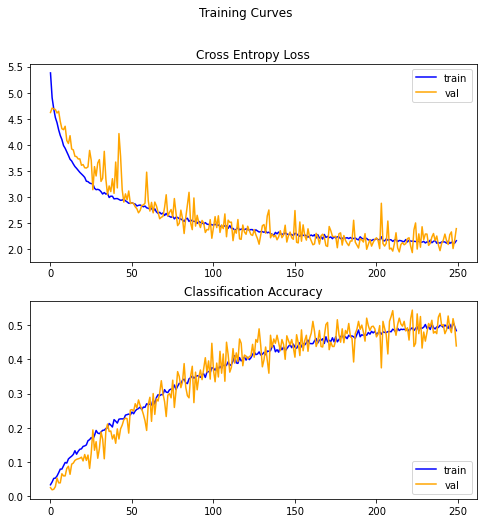

In [ ]:
summarize_diagnostics(CUSTOM_MODEL_AUG_40_history)

In [ ]:
CUSTOM_MODEL_AUG_40 = init_custom_aug_model(summary = False)
CUSTOM_MODEL_AUG_40_history = train_model(CUSTOM_MODEL_AUG_40, 400, 66, 5, cb = True)

Epoch 1/400
66/66 [==============================] - 2s 28ms/step - loss: 5.3799 - accuracy: 0.0315 - val_loss: 4.6022 - val_accuracy: 0.0328
Epoch 2/400
66/66 [==============================] - 1s 22ms/step - loss: 4.9197 - accuracy: 0.0282 - val_loss: 4.6489 - val_accuracy: 0.0219
Epoch 3/400
66/66 [==============================] - 1s 22ms/step - loss: 4.7402 - accuracy: 0.0385 - val_loss: 4.7572 - val_accuracy: 0.0188
Epoch 4/400
66/66 [==============================] - 1s 22ms/step - loss: 4.5815 - accuracy: 0.0501 - val_loss: 4.8571 - val_accuracy: 0.0234
Epoch 5/400
66/66 [==============================] - 2s 23ms/step - loss: 4.4779 - accuracy: 0.0571 - val_loss: 5.0257 - val_accuracy: 0.0234
Epoch 6/400
66/66 [==============================] - 1s 22ms/step - loss: 4.4026 - accuracy: 0.0613 - val_loss: 4.8690 - val_accuracy: 0.0516
Epoch 7/400
66/66 [==============================] - 1s 22ms/step - loss: 4.2678 - accuracy: 0.0655 - val_loss: 4.6473 - val_accuracy: 0.0312
Epoch 

66/66 [==============================] - 1s 23ms/step - loss: 2.8100 - accuracy: 0.2640 - val_loss: 2.6989 - val_accuracy: 0.2844
Epoch 59/400
66/66 [==============================] - 2s 23ms/step - loss: 2.7584 - accuracy: 0.2743 - val_loss: 2.7192 - val_accuracy: 0.2594
Epoch 60/400
66/66 [==============================] - 1s 22ms/step - loss: 2.7772 - accuracy: 0.2743 - val_loss: 2.7144 - val_accuracy: 0.2984
Epoch 61/400
66/66 [==============================] - 1s 22ms/step - loss: 2.7287 - accuracy: 0.2874 - val_loss: 2.7424 - val_accuracy: 0.2906
Epoch 62/400
66/66 [==============================] - 1s 22ms/step - loss: 2.7479 - accuracy: 0.2801 - val_loss: 2.7182 - val_accuracy: 0.2688
Epoch 63/400
66/66 [==============================] - 2s 24ms/step - loss: 2.7627 - accuracy: 0.2835 - val_loss: 2.5451 - val_accuracy: 0.3375
Epoch 64/400
66/66 [==============================] - 1s 22ms/step - loss: 2.7302 - accuracy: 0.2857 - val_loss: 2.5398 - val_accuracy: 0.3391
Epoch 65/400

66/66 [==============================] - 2s 24ms/step - loss: 2.3869 - accuracy: 0.4016 - val_loss: 2.1997 - val_accuracy: 0.4484
Epoch 116/400
66/66 [==============================] - 1s 22ms/step - loss: 2.3828 - accuracy: 0.3981 - val_loss: 2.3630 - val_accuracy: 0.4281
Epoch 117/400
66/66 [==============================] - 2s 24ms/step - loss: 2.3659 - accuracy: 0.3974 - val_loss: 2.3611 - val_accuracy: 0.4062
Epoch 118/400
66/66 [==============================] - 1s 23ms/step - loss: 2.3497 - accuracy: 0.4060 - val_loss: 2.1408 - val_accuracy: 0.4672
Epoch 119/400
66/66 [==============================] - 1s 22ms/step - loss: 2.4047 - accuracy: 0.3968 - val_loss: 2.3885 - val_accuracy: 0.4375
Epoch 120/400
66/66 [==============================] - 1s 22ms/step - loss: 2.3519 - accuracy: 0.4145 - val_loss: 2.5468 - val_accuracy: 0.3891
Epoch 121/400
66/66 [==============================] - 1s 22ms/step - loss: 2.3601 - accuracy: 0.4031 - val_loss: 2.2609 - val_accuracy: 0.4281
Epoch 

Epoch 172/400
66/66 [==============================] - 1s 22ms/step - loss: 2.2145 - accuracy: 0.4605 - val_loss: 1.9162 - val_accuracy: 0.5359
Epoch 173/400
66/66 [==============================] - 2s 23ms/step - loss: 2.2019 - accuracy: 0.4637 - val_loss: 2.2172 - val_accuracy: 0.4406
Epoch 174/400
66/66 [==============================] - 1s 22ms/step - loss: 2.2257 - accuracy: 0.4574 - val_loss: 2.0323 - val_accuracy: 0.4844
Epoch 175/400
66/66 [==============================] - 1s 22ms/step - loss: 2.2238 - accuracy: 0.4583 - val_loss: 2.0869 - val_accuracy: 0.5000
Epoch 176/400
66/66 [==============================] - 1s 22ms/step - loss: 2.2375 - accuracy: 0.4541 - val_loss: 2.1883 - val_accuracy: 0.4641
Epoch 177/400
66/66 [==============================] - 1s 22ms/step - loss: 2.2230 - accuracy: 0.4600 - val_loss: 2.1946 - val_accuracy: 0.4750
Epoch 178/400
66/66 [==============================] - 1s 22ms/step - loss: 2.2194 - accuracy: 0.4540 - val_loss: 2.2265 - val_accuracy:

Epoch 229/400
66/66 [==============================] - 1s 22ms/step - loss: 2.1354 - accuracy: 0.4936 - val_loss: 2.3381 - val_accuracy: 0.4578
Epoch 230/400
66/66 [==============================] - 1s 22ms/step - loss: 2.1509 - accuracy: 0.4833 - val_loss: 2.2035 - val_accuracy: 0.5063
Epoch 231/400
66/66 [==============================] - 1s 22ms/step - loss: 2.1510 - accuracy: 0.4827 - val_loss: 1.9455 - val_accuracy: 0.5344
Epoch 232/400
66/66 [==============================] - 2s 23ms/step - loss: 2.1327 - accuracy: 0.4985 - val_loss: 1.8695 - val_accuracy: 0.5578
Epoch 233/400
66/66 [==============================] - 1s 22ms/step - loss: 2.1335 - accuracy: 0.4944 - val_loss: 2.2346 - val_accuracy: 0.4672
Epoch 234/400
66/66 [==============================] - 1s 22ms/step - loss: 2.1121 - accuracy: 0.4996 - val_loss: 2.1687 - val_accuracy: 0.4734
Epoch 235/400
66/66 [==============================] - 1s 22ms/step - loss: 2.1280 - accuracy: 0.5008 - val_loss: 2.0934 - val_accuracy:

Epoch 286/400
66/66 [==============================] - 1s 22ms/step - loss: 2.0841 - accuracy: 0.5075 - val_loss: 2.3015 - val_accuracy: 0.4938
Epoch 287/400
66/66 [==============================] - 1s 22ms/step - loss: 2.0873 - accuracy: 0.5091 - val_loss: 2.0026 - val_accuracy: 0.5766
Epoch 288/400
66/66 [==============================] - 1s 22ms/step - loss: 2.0707 - accuracy: 0.5173 - val_loss: 2.1141 - val_accuracy: 0.5250
Epoch 289/400
66/66 [==============================] - 2s 24ms/step - loss: 2.0839 - accuracy: 0.5128 - val_loss: 2.2170 - val_accuracy: 0.4797
Epoch 290/400
66/66 [==============================] - 1s 22ms/step - loss: 2.0801 - accuracy: 0.5167 - val_loss: 1.9545 - val_accuracy: 0.5578
Epoch 291/400
66/66 [==============================] - 2s 24ms/step - loss: 2.0750 - accuracy: 0.5176 - val_loss: 2.1793 - val_accuracy: 0.5000
Epoch 292/400
66/66 [==============================] - 1s 22ms/step - loss: 2.0992 - accuracy: 0.5078 - val_loss: 2.2980 - val_accuracy:

In [ ]:
CUSTOM_MODEL_AUG_40_loss, CUSTOM_MODEL_AUG_40_acc = CUSTOM_MODEL_AUG_40.evaluate(x_test, map_label(y_test))

125/125 [==============================] - 1s 4ms/step - loss: 1.9873 - accuracy: 0.5318


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

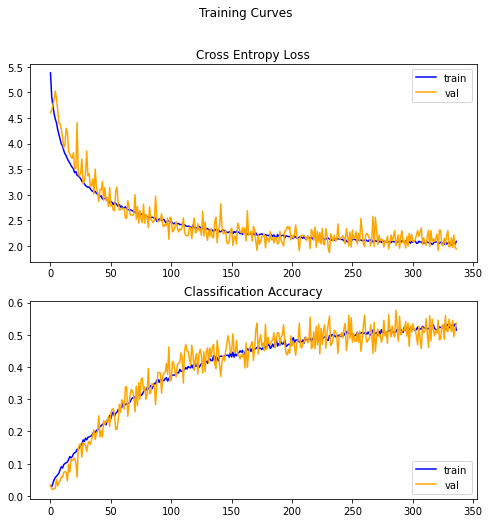

In [ ]:
summarize_diagnostics(CUSTOM_MODEL_AUG_40_history)

Παρατηρούμε πως όπως και πριν με το Data Augmentation εξαλείφεται εντελώς το overfitting. Παρ'όλα αυτά σε αυτό το πρόβλημα έχουμε αισθητή πτώση του accuracy κατά 10% το οποίο δεν είναι σε καμία περίπτωση επιθμητό. Αυτό που εικάζουμε είναι πως ο μετασχηματισμός αυτός δυσκιολεύει υπερβολικά το πρόβλημα της κατηγοριοποίησης εικόνων σε 40 κατηγορίες, αλλά όποια από τις επαυξήσεις δεδομένων και αν χρησιμοποιήσαμε παίρναμε το ίδιο αποτέλεσμα.

**Αποτελέσματα για 60 κλάσεις**

In [ ]:
CUSTOM_MODEL_AUG_60 = init_custom_aug_model(summary = False)
CUSTOM_MODEL_AUG_60_history = train_model(CUSTOM_MODEL_AUG_60, 250, 66, 5, cb = False)

Epoch 1/250
66/66 [==============================] - 2s 29ms/step - loss: 5.7444 - accuracy: 0.0238 - val_loss: 5.0722 - val_accuracy: 0.0172
Epoch 2/250
66/66 [==============================] - 2s 27ms/step - loss: 5.3332 - accuracy: 0.0240 - val_loss: 5.2697 - val_accuracy: 0.0125
Epoch 3/250
66/66 [==============================] - 2s 23ms/step - loss: 5.1201 - accuracy: 0.0335 - val_loss: 5.5952 - val_accuracy: 0.0125
Epoch 4/250
66/66 [==============================] - 2s 23ms/step - loss: 4.9512 - accuracy: 0.0382 - val_loss: 5.4709 - val_accuracy: 0.0172
Epoch 5/250
66/66 [==============================] - 2s 24ms/step - loss: 4.8423 - accuracy: 0.0418 - val_loss: 5.5014 - val_accuracy: 0.0156
Epoch 6/250
66/66 [==============================] - 2s 26ms/step - loss: 4.7578 - accuracy: 0.0392 - val_loss: 5.8726 - val_accuracy: 0.0234
Epoch 7/250
66/66 [==============================] - 2s 23ms/step - loss: 4.6524 - accuracy: 0.0429 - val_loss: 5.2030 - val_accuracy: 0.0266
Epoch 

66/66 [==============================] - 2s 23ms/step - loss: 3.3977 - accuracy: 0.1508 - val_loss: 3.5171 - val_accuracy: 0.1312
Epoch 59/250
66/66 [==============================] - 2s 23ms/step - loss: 3.3956 - accuracy: 0.1596 - val_loss: 3.3124 - val_accuracy: 0.1766
Epoch 60/250
66/66 [==============================] - 2s 23ms/step - loss: 3.4007 - accuracy: 0.1552 - val_loss: 3.5540 - val_accuracy: 0.1219
Epoch 61/250
66/66 [==============================] - 2s 23ms/step - loss: 3.3704 - accuracy: 0.1594 - val_loss: 3.3500 - val_accuracy: 0.1688
Epoch 62/250
66/66 [==============================] - 2s 26ms/step - loss: 3.3564 - accuracy: 0.1652 - val_loss: 3.4376 - val_accuracy: 0.1547
Epoch 63/250
66/66 [==============================] - 2s 25ms/step - loss: 3.3904 - accuracy: 0.1544 - val_loss: 3.6116 - val_accuracy: 0.1422
Epoch 64/250
66/66 [==============================] - 2s 24ms/step - loss: 3.3819 - accuracy: 0.1573 - val_loss: 3.2788 - val_accuracy: 0.1781
Epoch 65/250

66/66 [==============================] - 2s 23ms/step - loss: 3.1314 - accuracy: 0.2289 - val_loss: 3.1040 - val_accuracy: 0.2266
Epoch 116/250
66/66 [==============================] - 2s 24ms/step - loss: 3.1237 - accuracy: 0.2332 - val_loss: 3.0797 - val_accuracy: 0.2578
Epoch 117/250
66/66 [==============================] - 2s 23ms/step - loss: 3.1502 - accuracy: 0.2259 - val_loss: 3.0987 - val_accuracy: 0.2391
Epoch 118/250
66/66 [==============================] - 2s 25ms/step - loss: 3.1163 - accuracy: 0.2320 - val_loss: 2.9830 - val_accuracy: 0.2812
Epoch 119/250
66/66 [==============================] - 2s 25ms/step - loss: 3.1149 - accuracy: 0.2375 - val_loss: 3.3745 - val_accuracy: 0.2078
Epoch 120/250
66/66 [==============================] - 2s 24ms/step - loss: 3.0945 - accuracy: 0.2470 - val_loss: 3.0400 - val_accuracy: 0.2516
Epoch 121/250
66/66 [==============================] - 2s 23ms/step - loss: 3.1108 - accuracy: 0.2319 - val_loss: 3.3721 - val_accuracy: 0.2078
Epoch 

Epoch 172/250
66/66 [==============================] - 2s 24ms/step - loss: 2.9324 - accuracy: 0.2952 - val_loss: 2.9748 - val_accuracy: 0.2906
Epoch 173/250
66/66 [==============================] - 2s 23ms/step - loss: 2.8941 - accuracy: 0.2968 - val_loss: 2.7300 - val_accuracy: 0.3234
Epoch 174/250
66/66 [==============================] - 2s 25ms/step - loss: 2.9336 - accuracy: 0.2886 - val_loss: 2.6468 - val_accuracy: 0.3500
Epoch 175/250
66/66 [==============================] - 2s 24ms/step - loss: 2.9260 - accuracy: 0.2921 - val_loss: 2.9927 - val_accuracy: 0.3047
Epoch 176/250
66/66 [==============================] - 2s 25ms/step - loss: 2.8672 - accuracy: 0.3024 - val_loss: 3.0741 - val_accuracy: 0.2625
Epoch 177/250
66/66 [==============================] - 2s 24ms/step - loss: 2.9013 - accuracy: 0.3003 - val_loss: 2.8346 - val_accuracy: 0.3234
Epoch 178/250
66/66 [==============================] - 2s 24ms/step - loss: 2.9188 - accuracy: 0.2934 - val_loss: 2.9152 - val_accuracy:

Epoch 229/250
66/66 [==============================] - 2s 25ms/step - loss: 2.7904 - accuracy: 0.3326 - val_loss: 2.8519 - val_accuracy: 0.3406
Epoch 230/250
66/66 [==============================] - 2s 23ms/step - loss: 2.7457 - accuracy: 0.3365 - val_loss: 2.6571 - val_accuracy: 0.3500
Epoch 231/250
66/66 [==============================] - 2s 24ms/step - loss: 2.7694 - accuracy: 0.3362 - val_loss: 2.6544 - val_accuracy: 0.3547
Epoch 232/250
66/66 [==============================] - 2s 23ms/step - loss: 2.7810 - accuracy: 0.3343 - val_loss: 2.5921 - val_accuracy: 0.3516
Epoch 233/250
66/66 [==============================] - 2s 24ms/step - loss: 2.7785 - accuracy: 0.3391 - val_loss: 2.8044 - val_accuracy: 0.3500
Epoch 234/250
66/66 [==============================] - 2s 24ms/step - loss: 2.7706 - accuracy: 0.3297 - val_loss: 2.7108 - val_accuracy: 0.3313
Epoch 235/250
66/66 [==============================] - 2s 23ms/step - loss: 2.7748 - accuracy: 0.3379 - val_loss: 2.5780 - val_accuracy:

In [ ]:
CUSTOM_MODEL_AUG_60_loss, CUSTOM_MODEL_AUG_60_acc = CUSTOM_MODEL_AUG_60.evaluate(x_test, map_label(y_test))

188/188 [==============================] - 1s 5ms/step - loss: 2.5780 - accuracy: 0.3845


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

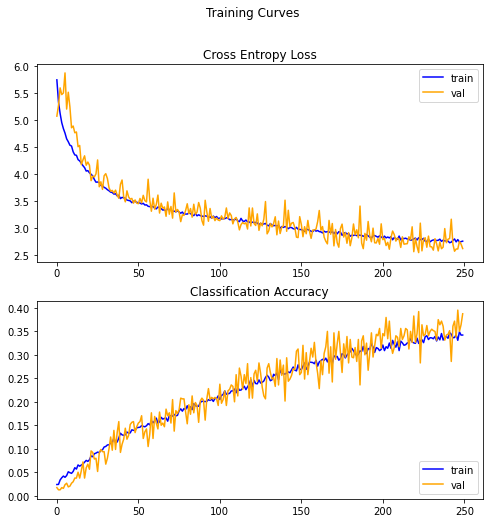

In [ ]:
summarize_diagnostics(CUSTOM_MODEL_AUG_60_history)

In [ ]:
CUSTOM_MODEL_AUG_60 = init_custom_aug_model(summary = False)
CUSTOM_MODEL_AUG_60_history = train_model(CUSTOM_MODEL_AUG_60, 400, 66, 5, cb = True)

Epoch 1/400
66/66 [==============================] - 2s 29ms/step - loss: 5.7480 - accuracy: 0.0208 - val_loss: 5.0661 - val_accuracy: 0.0172
Epoch 2/400
66/66 [==============================] - 2s 26ms/step - loss: 5.3259 - accuracy: 0.0292 - val_loss: 5.2870 - val_accuracy: 0.0219
Epoch 3/400
66/66 [==============================] - 2s 24ms/step - loss: 5.1138 - accuracy: 0.0343 - val_loss: 5.3120 - val_accuracy: 0.0281
Epoch 4/400
66/66 [==============================] - 2s 23ms/step - loss: 4.9875 - accuracy: 0.0355 - val_loss: 5.4922 - val_accuracy: 0.0141
Epoch 5/400
66/66 [==============================] - 2s 24ms/step - loss: 4.8540 - accuracy: 0.0366 - val_loss: 5.6882 - val_accuracy: 0.0203
Epoch 6/400
66/66 [==============================] - 2s 23ms/step - loss: 4.7961 - accuracy: 0.0386 - val_loss: 5.5698 - val_accuracy: 0.0109
Epoch 7/400
66/66 [==============================] - 2s 23ms/step - loss: 4.6835 - accuracy: 0.0424 - val_loss: 5.3558 - val_accuracy: 0.0219
Epoch 

66/66 [==============================] - 2s 23ms/step - loss: 3.3640 - accuracy: 0.1725 - val_loss: 3.5230 - val_accuracy: 0.1547
Epoch 59/400
66/66 [==============================] - 2s 24ms/step - loss: 3.3210 - accuracy: 0.1804 - val_loss: 3.4187 - val_accuracy: 0.1703
Epoch 60/400
66/66 [==============================] - 2s 24ms/step - loss: 3.3472 - accuracy: 0.1763 - val_loss: 3.7365 - val_accuracy: 0.1281
Epoch 61/400
66/66 [==============================] - 2s 23ms/step - loss: 3.2992 - accuracy: 0.1879 - val_loss: 3.4205 - val_accuracy: 0.1656
Epoch 62/400
66/66 [==============================] - 2s 23ms/step - loss: 3.3210 - accuracy: 0.1824 - val_loss: 3.5476 - val_accuracy: 0.1719
Epoch 63/400
66/66 [==============================] - 2s 24ms/step - loss: 3.3240 - accuracy: 0.1828 - val_loss: 3.3554 - val_accuracy: 0.1844
Epoch 64/400
66/66 [==============================] - 2s 26ms/step - loss: 3.3008 - accuracy: 0.1858 - val_loss: 3.2557 - val_accuracy: 0.1969
Epoch 65/400

66/66 [==============================] - 2s 23ms/step - loss: 3.0801 - accuracy: 0.2469 - val_loss: 3.0482 - val_accuracy: 0.2734
Epoch 116/400
66/66 [==============================] - 2s 23ms/step - loss: 3.0909 - accuracy: 0.2422 - val_loss: 3.1574 - val_accuracy: 0.2406
Epoch 117/400
66/66 [==============================] - 2s 23ms/step - loss: 3.0327 - accuracy: 0.2566 - val_loss: 3.1092 - val_accuracy: 0.2359
Epoch 118/400
66/66 [==============================] - 2s 25ms/step - loss: 3.0615 - accuracy: 0.2540 - val_loss: 2.9922 - val_accuracy: 0.2531
Epoch 119/400
66/66 [==============================] - 2s 23ms/step - loss: 3.0566 - accuracy: 0.2507 - val_loss: 3.0862 - val_accuracy: 0.2531
Epoch 120/400
66/66 [==============================] - 2s 23ms/step - loss: 3.0443 - accuracy: 0.2544 - val_loss: 3.3430 - val_accuracy: 0.1813
Epoch 121/400
66/66 [==============================] - 2s 23ms/step - loss: 3.0297 - accuracy: 0.2509 - val_loss: 3.0107 - val_accuracy: 0.2594
Epoch 

Epoch 172/400
66/66 [==============================] - 2s 23ms/step - loss: 2.8617 - accuracy: 0.3092 - val_loss: 2.9222 - val_accuracy: 0.2969
Epoch 173/400
66/66 [==============================] - 2s 25ms/step - loss: 2.8503 - accuracy: 0.3101 - val_loss: 2.9501 - val_accuracy: 0.2844
Epoch 174/400
66/66 [==============================] - 2s 23ms/step - loss: 2.8792 - accuracy: 0.3017 - val_loss: 2.8878 - val_accuracy: 0.3250
Epoch 175/400
66/66 [==============================] - 2s 24ms/step - loss: 2.8701 - accuracy: 0.3054 - val_loss: 3.0287 - val_accuracy: 0.2766


In [ ]:
CUSTOM_MODEL_AUG_60_loss, CUSTOM_MODEL_AUG_60_acc = CUSTOM_MODEL_AUG_60.evaluate(x_test, map_label(y_test))

188/188 [==============================] - 1s 5ms/step - loss: 2.9141 - accuracy: 0.2803


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

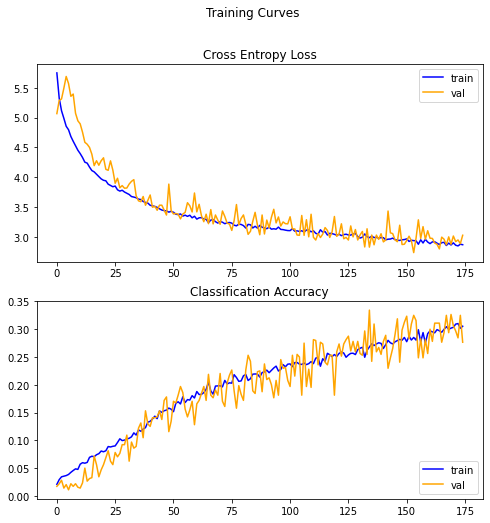

In [ ]:
summarize_diagnostics(CUSTOM_MODEL_AUG_60_history)

**Αποτελέσματα για 80 κλάσεις**

In [ ]:
CUSTOM_MODEL_AUG_80 = init_custom_aug_model(summary = False)
CUSTOM_MODEL_AUG_80_history = train_model(CUSTOM_MODEL_AUG_80, 250, 66, 5, cb = False)

Epoch 1/250
66/66 [==============================] - 2s 34ms/step - loss: 5.9478 - accuracy: 0.0154 - val_loss: 5.3587 - val_accuracy: 0.0094
Epoch 2/250
66/66 [==============================] - 2s 31ms/step - loss: 5.5556 - accuracy: 0.0208 - val_loss: 5.4737 - val_accuracy: 0.0109
Epoch 3/250
66/66 [==============================] - 2s 29ms/step - loss: 5.3705 - accuracy: 0.0245 - val_loss: 5.8820 - val_accuracy: 0.0063
Epoch 4/250
66/66 [==============================] - 2s 29ms/step - loss: 5.2347 - accuracy: 0.0253 - val_loss: 5.8909 - val_accuracy: 0.0109
Epoch 5/250
66/66 [==============================] - 2s 29ms/step - loss: 5.1340 - accuracy: 0.0310 - val_loss: 6.1723 - val_accuracy: 0.0047
Epoch 6/250
66/66 [==============================] - 2s 29ms/step - loss: 5.0969 - accuracy: 0.0277 - val_loss: 5.8878 - val_accuracy: 0.0078
Epoch 7/250
66/66 [==============================] - 2s 28ms/step - loss: 5.0009 - accuracy: 0.0337 - val_loss: 5.5665 - val_accuracy: 0.0078
Epoch 

66/66 [==============================] - 2s 25ms/step - loss: 3.6279 - accuracy: 0.1423 - val_loss: 3.6525 - val_accuracy: 0.1453
Epoch 59/250
66/66 [==============================] - 2s 25ms/step - loss: 3.6400 - accuracy: 0.1390 - val_loss: 3.5769 - val_accuracy: 0.1562
Epoch 60/250
66/66 [==============================] - 2s 25ms/step - loss: 3.6270 - accuracy: 0.1349 - val_loss: 3.5169 - val_accuracy: 0.1656
Epoch 61/250
66/66 [==============================] - 2s 28ms/step - loss: 3.5916 - accuracy: 0.1443 - val_loss: 3.8525 - val_accuracy: 0.1078
Epoch 62/250
66/66 [==============================] - 2s 28ms/step - loss: 3.5955 - accuracy: 0.1411 - val_loss: 3.5963 - val_accuracy: 0.1516
Epoch 63/250
66/66 [==============================] - 2s 25ms/step - loss: 3.5898 - accuracy: 0.1418 - val_loss: 3.5172 - val_accuracy: 0.1547
Epoch 64/250
66/66 [==============================] - 2s 28ms/step - loss: 3.5935 - accuracy: 0.1436 - val_loss: 3.5584 - val_accuracy: 0.1500
Epoch 65/250

66/66 [==============================] - 2s 25ms/step - loss: 3.3121 - accuracy: 0.2063 - val_loss: 3.4510 - val_accuracy: 0.1969
Epoch 116/250
66/66 [==============================] - 2s 27ms/step - loss: 3.3184 - accuracy: 0.2082 - val_loss: 3.3346 - val_accuracy: 0.2234
Epoch 117/250
66/66 [==============================] - 2s 28ms/step - loss: 3.2965 - accuracy: 0.2113 - val_loss: 3.4431 - val_accuracy: 0.2328
Epoch 118/250
66/66 [==============================] - 2s 25ms/step - loss: 3.2985 - accuracy: 0.2125 - val_loss: 3.3225 - val_accuracy: 0.2016
Epoch 119/250
66/66 [==============================] - 2s 27ms/step - loss: 3.2866 - accuracy: 0.2178 - val_loss: 3.1746 - val_accuracy: 0.2203
Epoch 120/250
66/66 [==============================] - 2s 25ms/step - loss: 3.3011 - accuracy: 0.2089 - val_loss: 3.4151 - val_accuracy: 0.2047
Epoch 121/250
66/66 [==============================] - 2s 25ms/step - loss: 3.2989 - accuracy: 0.2077 - val_loss: 3.3393 - val_accuracy: 0.2000
Epoch 

Epoch 172/250
66/66 [==============================] - 2s 28ms/step - loss: 3.1503 - accuracy: 0.2507 - val_loss: 3.3671 - val_accuracy: 0.2438
Epoch 173/250
66/66 [==============================] - 2s 25ms/step - loss: 3.1398 - accuracy: 0.2522 - val_loss: 3.1133 - val_accuracy: 0.2875
Epoch 174/250
66/66 [==============================] - 2s 26ms/step - loss: 3.1041 - accuracy: 0.2592 - val_loss: 3.1950 - val_accuracy: 0.2781
Epoch 175/250
66/66 [==============================] - 2s 29ms/step - loss: 3.1347 - accuracy: 0.2601 - val_loss: 3.0422 - val_accuracy: 0.3000
Epoch 176/250
66/66 [==============================] - 2s 28ms/step - loss: 3.1678 - accuracy: 0.2508 - val_loss: 3.1117 - val_accuracy: 0.2516
Epoch 177/250
66/66 [==============================] - 2s 27ms/step - loss: 3.1224 - accuracy: 0.2607 - val_loss: 3.3948 - val_accuracy: 0.2578
Epoch 178/250
66/66 [==============================] - 2s 25ms/step - loss: 3.1252 - accuracy: 0.2614 - val_loss: 3.3749 - val_accuracy:

Epoch 229/250
66/66 [==============================] - 2s 25ms/step - loss: 3.0115 - accuracy: 0.2850 - val_loss: 2.9401 - val_accuracy: 0.2953
Epoch 230/250
66/66 [==============================] - 2s 29ms/step - loss: 3.0225 - accuracy: 0.2888 - val_loss: 3.6247 - val_accuracy: 0.2047
Epoch 231/250
66/66 [==============================] - 2s 25ms/step - loss: 3.0234 - accuracy: 0.2865 - val_loss: 3.4285 - val_accuracy: 0.2422
Epoch 232/250
66/66 [==============================] - 2s 28ms/step - loss: 3.0744 - accuracy: 0.2779 - val_loss: 2.9406 - val_accuracy: 0.3031
Epoch 233/250
66/66 [==============================] - 2s 28ms/step - loss: 3.0528 - accuracy: 0.2766 - val_loss: 3.2130 - val_accuracy: 0.2656
Epoch 234/250
66/66 [==============================] - 2s 26ms/step - loss: 3.0462 - accuracy: 0.2850 - val_loss: 3.0091 - val_accuracy: 0.3094
Epoch 235/250
66/66 [==============================] - 2s 27ms/step - loss: 3.0312 - accuracy: 0.2829 - val_loss: 2.7535 - val_accuracy:

In [ ]:
CUSTOM_MODEL_AUG_80_loss, CUSTOM_MODEL_AUG_80_acc = CUSTOM_MODEL_AUG_80.evaluate(x_test, map_label(y_test))

250/250 [==============================] - 1s 4ms/step - loss: 2.8217 - accuracy: 0.3244


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

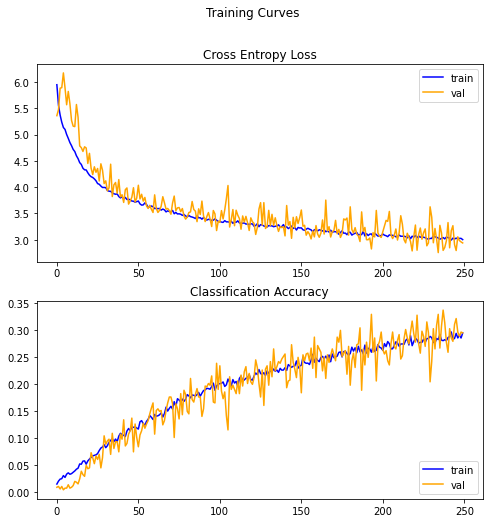

In [ ]:
summarize_diagnostics(CUSTOM_MODEL_AUG_80_history)

In [ ]:
CUSTOM_MODEL_AUG_80 = init_custom_aug_model(summary = False)
CUSTOM_MODEL_AUG_80_history = train_model(CUSTOM_MODEL_AUG_80, 400, 66, 5, cb = True)

Epoch 1/400
66/66 [==============================] - 2s 35ms/step - loss: 6.0115 - accuracy: 0.0150 - val_loss: 5.3543 - val_accuracy: 0.0141
Epoch 2/400
66/66 [==============================] - 2s 28ms/step - loss: 5.5660 - accuracy: 0.0217 - val_loss: 5.6023 - val_accuracy: 0.0125
Epoch 3/400
66/66 [==============================] - 2s 28ms/step - loss: 5.3770 - accuracy: 0.0245 - val_loss: 5.6791 - val_accuracy: 0.0031
Epoch 4/400
66/66 [==============================] - 2s 24ms/step - loss: 5.2518 - accuracy: 0.0257 - val_loss: 5.7493 - val_accuracy: 0.0141
Epoch 5/400
66/66 [==============================] - 2s 27ms/step - loss: 5.1477 - accuracy: 0.0282 - val_loss: 5.9194 - val_accuracy: 0.0172
Epoch 6/400
66/66 [==============================] - 2s 25ms/step - loss: 5.0601 - accuracy: 0.0326 - val_loss: 5.7507 - val_accuracy: 0.0156
Epoch 7/400
66/66 [==============================] - 2s 25ms/step - loss: 4.9900 - accuracy: 0.0312 - val_loss: 5.6459 - val_accuracy: 0.0047
Epoch 

66/66 [==============================] - 2s 25ms/step - loss: 3.7091 - accuracy: 0.1132 - val_loss: 3.9549 - val_accuracy: 0.0609
Epoch 59/400
66/66 [==============================] - 2s 25ms/step - loss: 3.7092 - accuracy: 0.1147 - val_loss: 3.7293 - val_accuracy: 0.1391
Epoch 60/400
66/66 [==============================] - 2s 25ms/step - loss: 3.6999 - accuracy: 0.1177 - val_loss: 3.7751 - val_accuracy: 0.1156
Epoch 61/400
66/66 [==============================] - 2s 25ms/step - loss: 3.6915 - accuracy: 0.1233 - val_loss: 3.9930 - val_accuracy: 0.0844
Epoch 62/400
66/66 [==============================] - 2s 26ms/step - loss: 3.6802 - accuracy: 0.1222 - val_loss: 3.8356 - val_accuracy: 0.0984
Epoch 63/400
66/66 [==============================] - 2s 25ms/step - loss: 3.6650 - accuracy: 0.1242 - val_loss: 3.7504 - val_accuracy: 0.1063
Epoch 64/400
66/66 [==============================] - 2s 28ms/step - loss: 3.6911 - accuracy: 0.1200 - val_loss: 3.7114 - val_accuracy: 0.1125
Epoch 65/400

66/66 [==============================] - 2s 25ms/step - loss: 3.3697 - accuracy: 0.1946 - val_loss: 3.3712 - val_accuracy: 0.1891
Epoch 116/400
66/66 [==============================] - 2s 25ms/step - loss: 3.3447 - accuracy: 0.1979 - val_loss: 3.3737 - val_accuracy: 0.2016
Epoch 117/400
66/66 [==============================] - 2s 24ms/step - loss: 3.3323 - accuracy: 0.2064 - val_loss: 3.4064 - val_accuracy: 0.2234
Epoch 118/400
66/66 [==============================] - 2s 25ms/step - loss: 3.3516 - accuracy: 0.1948 - val_loss: 3.3235 - val_accuracy: 0.2078
Epoch 119/400
66/66 [==============================] - 2s 24ms/step - loss: 3.3573 - accuracy: 0.2023 - val_loss: 3.3081 - val_accuracy: 0.2016
Epoch 120/400
66/66 [==============================] - 2s 30ms/step - loss: 3.3450 - accuracy: 0.2045 - val_loss: 3.2612 - val_accuracy: 0.2344
Epoch 121/400
66/66 [==============================] - 2s 25ms/step - loss: 3.3040 - accuracy: 0.2051 - val_loss: 3.7638 - val_accuracy: 0.1750
Epoch 

Epoch 172/400
66/66 [==============================] - 2s 26ms/step - loss: 3.1611 - accuracy: 0.2528 - val_loss: 2.8671 - val_accuracy: 0.3016
Epoch 173/400
66/66 [==============================] - 2s 24ms/step - loss: 3.1738 - accuracy: 0.2437 - val_loss: 3.1409 - val_accuracy: 0.2812
Epoch 174/400
66/66 [==============================] - 2s 24ms/step - loss: 3.1509 - accuracy: 0.2473 - val_loss: 3.2995 - val_accuracy: 0.2109
Epoch 175/400
66/66 [==============================] - 2s 24ms/step - loss: 3.1559 - accuracy: 0.2508 - val_loss: 3.1062 - val_accuracy: 0.2641
Epoch 176/400
66/66 [==============================] - 2s 27ms/step - loss: 3.1456 - accuracy: 0.2467 - val_loss: 3.5532 - val_accuracy: 0.2016
Epoch 177/400
66/66 [==============================] - 2s 25ms/step - loss: 3.1636 - accuracy: 0.2493 - val_loss: 3.1269 - val_accuracy: 0.2516
Epoch 178/400
66/66 [==============================] - 2s 26ms/step - loss: 3.1713 - accuracy: 0.2487 - val_loss: 3.8284 - val_accuracy:

In [ ]:
CUSTOM_MODEL_AUG_80_loss, CUSTOM_MODEL_AUG_80_acc = CUSTOM_MODEL_AUG_80.evaluate(x_test, map_label(y_test))

250/250 [==============================] - 1s 4ms/step - loss: 2.8499 - accuracy: 0.3105


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

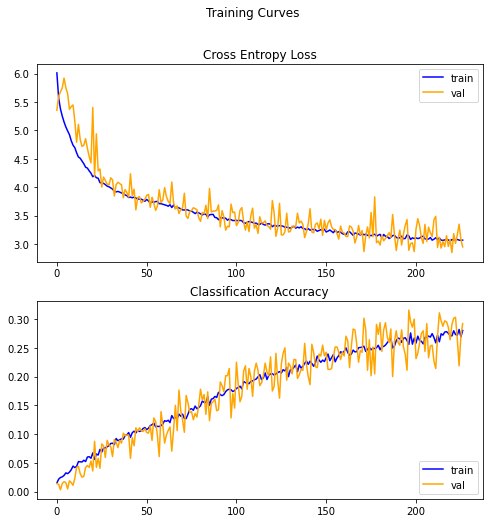

In [ ]:
summarize_diagnostics(CUSTOM_MODEL_AUG_80_history)

Όπως και στα προηγούμενα προβλήματα έτσι και σε αυτό το data augmentation εξάλειψε εντελ΄ςω το overfitting. Στη συγκεκριμένη περίπτωση όμω το ήδη δύσκολο πρόβλημα της κατηγοριοποίησης σε 80 κατηγορίες έγινε ακόμα χειρότερο με αποτέλεσμα να μειωθεί πολύ το τελικό accuracy. Συγκεκριμένα παρατηρούμε μια μείωση της τάξης του 23% στο test set πράγμα μη αποδεκτό.

#### Γενικές Παρατηρήσεις σχετικά με Data Augmentation

Μετά την εφαρμογή του Data Augmentation στα δεδομένα μας παρατηρήσαμε τα παρακάτω.

Αρχικά, θέλουμε να σημειώσουμε πως το δυσκολότερο κομμάτι όπως εμείς συμπεράναμε στη διαδικασία του Data Augmentation είναι η εύρεση ενός μετασχηματισμού ο οποίος αποτελεί τη μέση λύση μεταξύ ενός πολύ απλού μετασχηματισμού που δεν βελτιώνει καθόλου στην ουσία τα δεδομένα του προβλήματος και ενός αρκετά σύνθετου, ο οποίος αυξάνει δυσανάλογα τη δυσκολία του προβλήματος συγκριτικά με τα επιπλέον δεδομένα που προσφέρει. Αρκετός χρόνος από τις δοκιμές μας "σπαταλήθηκε" άσκοπα προσπαθώντας να κάνουμε τα μοντέλα μας να κερδίσουν από πολύ σύνθετους μετασχηματισμούς πράγμα που κατανοήσαμε στην πορεία πως είναι λάθος.

Όσον αφορά τη διαφορές μεταξύ της εκπαίδευσης με και χωρίς data augmentation, όπως είναι και λογικό συμπέρασμα των όσων αναφέραμε νωρίτερα η εκπαίδευση με data augmentation ως πιο δύσκολο πρόβλημα απαιτούσε περισσότερο χρόνο (όπως αυτός αποτυπώνεται από τις εποχές εκπαίδευσης). Επιπλέον, παρατηρήσαμε πως επιτυγχάναμε σχεδόν ολική εξάλειψη του overfitting. 

Παρ'όλα αυτά δεν καταφέραμε να πετύχουμε καλύτερα αποτελέσματα όσον αφορά το accuracy με τη χρήση data augmentation ιδιαίτερα στα πιο δύσκολα προβλήματα (από 40 κλάσεις και πάνω). Συνεπώς, αν έπρεπε να επιλέξουμε τελικά μοντέλα πιθανώς θα προτιμούσαμε το αρχικό overfitting για τα δυσκολότερα προβλήματα και θα κρατούσαμε το μοντέλο που εκπαιδεύτηκε με data augmentation μόνο στο πρόβλημα των 20 κλάσεων.

### Συμπεράσματα στα "From Scratch" μοντέλα

#### Σχετικά με τη δομή των "From Scratch" μοντέλων

Από τους πειραματισμούς μας με τα "from scratch" μοντέλα φτάσαμε στα εξής συμπεράσματα.

Αρχικά, πρέπει να διευκρινίσουμε πως το μοντέλο στο οποίο καταλήξαμε μπορεί να βελτιωθεί και άλλο ως προς την απόδοσή του αυξάνοντας όμως παράλληλα την πολυπλοκότητά του με ό,τι αυτό συνεπάγεται (παράμετροι ως προς βελτιστοποίηση, χρόνος εκπαίδευσης). Επιλέξαμε να σταματήσουμε την αναζήτηση για ένα "from scratch" μοντέλο σε αυτό που παρουσιάστηκε τελικώς παραπάνω, καθώς αποτελεί ένα δίκτυο όχι τόσο σύνθετο (εκπαιδεύεται εύκολα και γρήγορα), αλλά με ικανοποιητική αποτελεσματικότητα και με επίπεδα δομημένα με τρόπο τέτοιο που καταδεικνύει την κατανόησή μας ως προς τη λειτουργικότητα του κάθε layer.

Συγκεκριμένα, στο τελικό μοντέλο χρησιμοποιήσαμε επίπεδα Dropout με σκοπό την αποφυγή της υπερεκπαίδευσης, επίπεδα BatchNormalization έτσι ώστε να γίνεται επιτυχώς η μεταφορά του σφάλματος κατά την οπισθοδρόμηση και την ανανέωση των βαρών του δικτύου. Επιπλέον, η χρήση MaxPooling2D μας επέτρεψε σε κάθε block-επιπέδων να κρατήσουμε μόνο τα σημαντικότερα χαρακτηριστικά από άποψη έντασης για να τροφοδοτήσουν τα επόμενα επίπεδα, μειώνοντας τη διαστατικότητα της εισόδου σε κάθε block και επιτρέποντας μας να αυξήσιυμε της παραμέτρους και την υπολογιστική πολυπλοκότητα των Conv2D επιπέδων που ακολουθούσαν χωρίς να αυξάνεται δραματικά το χρονικό κόστος εκπαίδευσης.

## Μοντέλα "transfer learning"

### Accuracy Optimization


#### Ορισμός συναρτήσεων

Στο σημείο αυτό έγιναν οι εξής τροποποιήσεις μερικών δωσμένων συναρτήσεων:

* δημιουργία ξεχωριστού dataset για το Xception, ώστε να ικανοποιείται το απαιτούμενο μέγεθος εισόδου 71x71x3.
* τροποποίηση της συνάρτησης *train_model* ώστε να μπορούμε να τη χρησιμοποιήσουμε με ή χωρίς callbacks, για το memory optimization που θα εξεταστεί στη συνέχεια.

In [ ]:
# we user prefetch https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch 
# see also AUTOTUNE
# the dataset is now "infinite"

BATCH_SIZE = 128
AUTOTUNE = tf.data.experimental.AUTOTUNE # https://www.tensorflow.org/guide/data_performance

# sort 

def _input_fn(x,y, BATCH_SIZE):
    ds = tf.data.Dataset.from_tensor_slices((x,y))
    ds = ds.shuffle(buffer_size=data_size)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.repeat()
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds =_input_fn(x_train,map_label(y_train), BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,map_label(y_val), BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,map_label(y_test), BATCH_SIZE) #PrefetchDataset object

#this is for Xception, with shape (71,71,3)
x_train_xc = tf.image.resize(x_train, (71, 71))
x_val_xc = tf.image.resize(x_val, (71, 71))
x_test_xc = tf.image.resize(x_test, (71, 71))

train_ds_xc =_input_fn(x_train_xc,map_label(y_train), BATCH_SIZE) #PrefetchDataset object
validation_ds_xc =_input_fn(x_val_xc,map_label(y_val), BATCH_SIZE) #PrefetchDataset object
test_ds_xc =_input_fn(x_test_xc,map_label(y_test), BATCH_SIZE) #PrefetchDataset object


# steps_per_epoch and validation_steps for training and validation: https://www.tensorflow.org/guide/keras/train_and_evaluate

def train_model(model_name, model, epochs, steps_per_epoch, validation_steps, verbose, cb = True):
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights = True)
    if cb:
        if model_name == 'Xception':
            history = model.fit(train_ds_xc, callbacks=[callback], epochs=epochs, 
                            steps_per_epoch=steps_per_epoch, validation_data=validation_ds_xc, 
                            validation_steps=validation_steps, verbose=verbose)
        else:
            history = model.fit(train_ds, callbacks=[callback], epochs=epochs, 
                            steps_per_epoch=steps_per_epoch, validation_data=validation_ds, 
                            validation_steps=validation_steps, verbose=verbose)
    else:
        if model_name == 'Xception':
            history = model.fit(train_ds_xc, callbacks=[], epochs=epochs, 
                            steps_per_epoch=steps_per_epoch, validation_data=validation_ds_xc, 
                            validation_steps=validation_steps, verbose=verbose)
        else:
            history = model.fit(train_ds, callbacks=[], epochs=epochs, 
                            steps_per_epoch=steps_per_epoch, validation_data=validation_ds, 
                            validation_steps=validation_steps, verbose=verbose)        
    return(history)

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	plt.figure(figsize=(8, 8))
	plt.suptitle('Training Curves')
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='val')
	plt.legend(loc='upper right')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='val')
	plt.legend(loc='lower right')
	return plt
 
# print test set evaluation metrics
def model_evaluation(model_name, model, evaluation_steps):
    print('\nTest set evaluation metrics')
    if model_name == 'Xception':
        loss0,accuracy0 = model.evaluate(test_ds_xc, steps = evaluation_steps)
    else:
        loss0,accuracy0 = model.evaluate(test_ds, steps = evaluation_steps)
    print("loss: {:.2f}".format(loss0))
    print("accuracy: {:.2f}".format(accuracy0))

def model_report(model, history, evaluation_steps = 10):
	plt = summarize_diagnostics(history)
	plt.show()
	model_evaluation(model_name, model, evaluation_steps)

In [ ]:
IMG_SHAPE = x_train_ds[1].shape

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(4),
  tf.keras.layers.experimental.preprocessing.RandomContrast(factor=0.3, seed=5, name=None),
  tf.keras.layers.experimental.preprocessing.PreprocessingLayer(trainable=True, name=None, dtype=None, dynamic=False)
])

Μέσω της παρακάτω συνάρτησης δημιουργούμε ένα μοντέλο με μεταφορά γνώσης από ήδη προεκπαιδευμένα μοντέλα. (εντέλει ασχοληθήκαμε με 2 από τα παρακάτω μοντέλα)  
Αρχικά, παίρνουμε τα βάρη από ένα προεκπαιδευμένο μοντέλο. Στη συνέχεια, μέσω fine tuning προσπαθούμε να βελτιστοποιήσουμε την απόδοση του μοντέλου, εξετάζοντας πόσα επίπεδα θα συνεχίσουν την εκπαίδευση και πόσα θα κρατήσουν τα προηγούμενα βάρη.
Τέλος, προσθέτουμε κάποια επιπλέον επίπεδα ανάλογα με τις ανάγκες του κάθε μοντέλου, καθώς και τα κριτήρια βελτιστοποίησής του (πχ ως προς υπερεκπαίδευση).

In [ ]:
def transfer_model(model_name, trainable, trainable_layers, 
                   dropout_rate, data_aug, optimizer, loss,
                   epochs, steps_per_epoch, validation_steps, 
                   evaluation_steps, verbose, cb = True):
   
    if model_name == "ResNet152V2":
        model_init = tf.keras.applications.ResNet152V2(input_shape = IMG_SHAPE, include_top = False, weights = 'imagenet')
    elif model_name == "ResNet101":
        model_init = tf.keras.applications.ResNet101(input_shape = IMG_SHAPE, include_top = False, weights = 'imagenet')
    elif model_name == "DenseNet169":
        model_init = tf.keras.applications.DenseNet169(input_shape = IMG_SHAPE, include_top = False, weights = 'imagenet')
    elif model_name == "VGG19":
        model_init = tf.keras.applications.VGG19(input_shape = IMG_SHAPE, include_top = False, weights = 'imagenet')
    elif model_name == "InceptionV3":
        model_init = tf.keras.applications.InceptionV3(include_top = True, weights = 'imagenet')
    elif model_name == "Xception":
        model_init = tf.keras.applications.Xception(input_shape = (71, 71, IMG_SHAPE[2]), include_top = False, weights = 'imagenet')
    else:
        model_init = tf.keras.applications.VGG16(input_shape = IMG_SHAPE, include_top = False, weights = 'imagenet')
  

    MODEL = model_init.layers[0](model_init)
    print("Number of layers in the base model: ", len(MODEL.layers))
    
    # unfreeze conv layers
    MODEL.trainable=True

    if (model_name == "ResNet152V2" or model_name == "ResNet101"):
        for layer in MODEL.layers:
            if isinstance(layer, tf.keras.layers.Conv2D):
                layer.trainable = False
            elif len(layer.trainable_weights) > 0:
                layer.trainable = True
    
    if (trainable==False):
        stop_at = len(MODEL.layers) - trainable_layers 
        for layer in MODEL.layers[:stop_at]:
            layer.trainable =  False
    
    else:
        for layer in MODEL.layers:
            layer.trainable = True
    
    batch_layer = tf.keras.layers.BatchNormalization()
    dropout_layer = tf.keras.layers.Dropout(rate = dropout_rate)
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    prediction_layer = tf.keras.layers.Dense(len(our_classes),activation='softmax')
    
    
    if data_aug==True:
        model = tf.keras.Sequential([data_augmentation, MODEL, dropout_layer, global_average_layer, prediction_layer])
    else:
        model = tf.keras.Sequential([MODEL, dropout_layer, global_average_layer, prediction_layer])
    
    model.compile(optimizer= optimizer, loss=loss, metrics=["accuracy"])
    history = train_model(model_name, model, epochs, steps_per_epoch, validation_steps, verbose, cb)

    model_report(model, history, evaluation_steps)
    return model, history

Εδώ ορίζουμε τον αριθμό των βημάτων ανά εποχή ανάλογα με το batch_size που χρησιμοποιούμε.

In [ ]:
steps_per_epoch = x_train.shape[0]//BATCH_SIZE
validation_steps = x_val.shape[0]//BATCH_SIZE
evaluation_steps = x_test.shape[0]//BATCH_SIZE

Θα εξετάσουμε αναλυτικά τα 2 παρακάτω μοντέλα, σημειώνοντας την επίδραση διαφόρων παραμέτρων στην απόδοσή τους.

* DenseNet169
* Xception

#### **DenseNet169**

To DenseNet-169 αποτελεί ένα δίκτυο στο οποίο κάθε επίπεδο συνδέεται με τα υπόλοιπα επίπεδα σε μία feedforward μορφή. Σε αντίθεση με τα συνηθισμένα CNN L επιπέδων, τα οποία έχουν L συνδέσεις μία με το επόμενο και μία με το προηγούμενο, το DenseNet έχει L(L+1)/2 άμεσες συνδέσεις. Για κάθε επίπεδο οι χάρτες χαρακτηριστικών από όλα τα επίπεδα που έχουν προηγηθεί λαμβάνονται ως είσοδος, ενώ ο χάρτης εξόδου του επιπέδου συμμετέχει ως είσοδος σε όλα τα επίπεδα που το διαδέχονται στο δίκτυο. Τα κυριότερα πλεονεκτήματα αυτού του είδους των Πυκνά Συνδεδεμένων Συνελικτικών Δικτύων είναι ότι αντιμετωπίζουν το πρόβλημα των vanishing gradients, εντείνουν την επαναχρησιμοποίηση και την προσθοδρόμηση των χαρακτηριστικών και  μειώνουν το πλήθος των παρμέτρων του δικτύου.

Η αρχιτεκτονική του δικτύου αυτού περιγράφεται από τις παρακάτω εικόνες:

<a href="https://i.imgur.com/wWHWbQt.png"><img src="https://i.imgur.com/wWHWbQt.png" alt="2" border="0"></a>  

<a href="https://i.imgur.com/oiTdqJL.png"><img src="https://i.imgur.com/oiTdqJL.png" alt="2" border="0"></a>


   
Για όλες τις δοκιμές χρησιμοποιήσαμε τις ίδιες παραμέτρους, αλλάζοντας κάθε φορά την παράμετρο προς εξέταση, και στο τέλος καταλήξαμε στον καλύτερο συνδυασμό, με βάση την απόδοση του μοντέλου. Όλες οι δοκιμές που ακολουθούν έγιναν για αριθμό κλάσεων ίσο με 20. 

Για την αρχική δοκιμή του μοντέλου χρησιμοποιήσαμε τις παρακάτω τιμές:

* learning rate: 0.00005
* trainable: True
* trainable layers: All
* dropout rate: 0.5
* data augmentation: False
* optimizer: Adam
* loss : Crossentropy
* epochs: 40

Στη συνέχεια, τροποποιήσουμε τις παραπάνω μεταβλητές ως εξής (αναφέρονται μόνο εκείνες που είναι διαφορετικές από τις παρακάτω για κάθε δοκιμή):

1. trainable: False, trainable layers: 0
2. trainable: False, trainable layers: 10
3. trainable: False, trainable layers: 50
4. data augmentation: True
5. learning rate: 0.0005
6. dropout rate: 0.2
7. optimizer: RMSprop

Επίσης, κάναμε και τις παρακάτω δοκιμές, διατηρώντας τις αρχικές παραμέτρους:

8. Θέσαμε το batch size ίσο με 64.
9. Προσθέσαμε ένα batch normalization layer.
10. Θέσαμε το input size ίσο με 71x71x3

In [ ]:
models = ["DenseNet169"]
lr = 0.00005
trainable = True
trainable_layers = 0 #afou trainable true einai ashmanto
dropout_rate = 0.5
data_aug = True
optimizer = tf.keras.optimizers.Adam(learning_rate = lr)
loss = tf.keras.losses.sparse_categorical_crossentropy
epochs = 40
verbose=1

start_time = time.time()
for model_name in models:
    model, history = transfer_model(model_name, trainable, trainable_layers, 
                                    dropout_rate, data_aug, optimizer, loss,
                                    epochs, steps_per_epoch, validation_steps, 
                                    evaluation_steps,verbose)
print("--- %s seconds ---" % (time.time() - start_time))

Παρακάτω βρίσκονται συγκεντρωτικά όλα τα αποτελέσματα των παραπάνω δοκιμών, μαζί με κάποια συμπεράσματα.

In [1]:
name = ["standard", "trainable_0", "trainable_10", "trainable_50",
        "data_augmentation","lr=0.0005", "dropout=0.2", "RMSprop optimizer",
        "batch_s=64", "+batch_norm_layer", "resized_71x71"]

test_accuracy = [0.72, 0.52, 0.59, 0.63, 0.7, 0.71, 0.71, 0.7, 0.72, 0.7, 0.4]
test_loss = [1.06, 1.64, 1.35, 1.22, 1.1, 1.41, 1.32, 2.13, 1.41, 1.4, 2.14]
train_accuracy = [0.99, 0.48, 0.68, 0.95, 0.86, 0.99, 0.99, 0.97, 0.99, 0.97, 0.97]
col = ['method', 'test_accuracy', 'test_loss', 'train_accuracy']

df = pd.DataFrame(list(zip(name, test_accuracy, test_loss, train_accuracy)), 
                      columns = col)
df

,method,test_accuracy,test_loss,train_accuracy
0,standard,0.72,1.06,0.99
1,trainable_0,0.52,1.64,0.48
2,trainable_10,0.59,1.35,0.68
3,trainable_50,0.63,1.22,0.95
4,data_augmentation,0.70,1.10,0.86
5,lr=0.0005,0.71,1.41,0.99
6,dropout=0.2,0.71,1.32,0.99
7,RMSprop optimizer,0.70,2.13,0.97
8,batch_s=64,0.72,1.41,0.99
9,+batch_norm_layer,0.70,1.40,0.97


* Σχετικά με το πλήθος των επιπέδων προς εκπαίδευση:  
Παρατηρούμε πως η απόδοση του μοντέλου αυξάνεται όσο κάνουμε "unfreeze" περισσότερα επίπεδα. Ωστόσο, καθώς ξαναεκπαιδεύουμε περισσότερα επίπεδα, κάνουμε πιο σύνθετη την εκπαίδευση, με αποτέλεσμα να γίνεται υπερεκπαίδευση, όπως φαίνεται και από το train accuracy.  
  
  
* Σχετικά με τον optimizer:  
Βέλτιστος είναι o Adam.


* Σχετικά με το data augmentation:  
Εδώ παρατηρούμε πως παρόλο που η απόδοση του συστήματος παρουσιάζει μία μικρή μείωση, η υπερεκπαίδευση ελαττώνεται αισθητά.


* Σχετικά με τις υπόλοιπες παραμέτρους, δεν παρουσιάστηκε αισθητή διαφορά για τις διάφορες τιμές τους.

Συνεπώς, με βάση τα παραπάνω συμπεράσματα, για την τελική μορφή του μοντέλου κρατήσαμε τις αρχικές παραμέτρους, θέτοντας trainable όλα τα επίπεδα, ενώ για να αντιμετωπίσουμε την υπερεκπαίδευση χρησιμοποιήσαμε το data augmentation layer, με ένα μικρό κόστος στην απόδοση. Επίσης, διατηρήσαμε τον αριθμό batch size 128, το αρχικό μέγεθος, ενώ δεν προσθέσαμε το batch normalization layer πριν το dropout.   

Για αυτές λοιπόν τις τιμές, εξετάσαμε την απόδοση του μοντέλου για 80 κλάσεις, με τα αποτελέσματα και τους χρόνους εκπαίδευσης για 20 και 80 κλάσεις να είναι τα εξής:

* 20 κλάσεις:  0.7 test accuracy, 167sec training time
* 80 κλάσεις:  0.55 test accuracy, 598sec training time

Όπως είναι λογικό, ο χρόνος εκπαίδευσης είναι ανάλογος του αριθμού των δεδομένων, άρα και των κλάσεων. Ταυτόχρονα, παρατηρούμε μείωση της απόδοσης του μοντέλου, κάτι το οποίο αναμέναμε αφού υπάρχουν πολύ περισσότερα και διαφορετικά δεδομένα, με πιθανές ομοιότητες, οι οποίες δυσκολεύουν την εκπαίδευση του μοντέλου.

#### **Xception**

Το Xception είναι μία ακραία έκδοση του Inception, η οποία έχει κατασκευάστει από τη Google. Βασίζεται σε μία παραλλαγή της διακριτής συνέλιξης σε βάθος (Depthwise Seperable Convolution). Ενώ η κανονική έκδοση αυτής αποτελείται από μία συνέλιξη σε βάθος που ακολουθείται από μία σημειακή συνέλιξη η παραλλαγή που χρησιμοποιείται στο Xception αντιστρέφει τη σειρά με τη σημειακή συνέλιξη να προηγείται της συνέλιξης σε βάθος. Ένα από τα κύρια πλεονεκτήματα αυτής της μεθόδου είναι ότι παύει πλέον να υπάρχει μη-γραμμικότητα μετά την πρώτη πράξη.   


<a href="https://towardsdatascience.com/review-xception-with-depthwise-separable-convolution-better-than-inception-v3-image-dc967dd42568"><img src="https://miro.medium.com/max/700/1*J8dborzVBRBupJfvR7YhuA.png" alt="2" border="0"></a>    

Η συνολική αρχιτεκτονική του περιγράφεται στην εικόνα που ακολουθεί:    
  
    
  
<a href="https://towardsdatascience.com/review-xception-with-depthwise-separable-convolution-better-than-inception-v3-image-dc967dd42568"><img src="https://miro.medium.com/max/700/1*hOcAEj9QzqgBXcwUzmEvSg.png" alt="2" border="0"></a>  

Θα ακολουθήσουμε την ίδια μεθοδολογία με το δίκτυο DenseNet ως προς την εξέταση των συνδυασμών των υπερπαραμέτρων.

In [ ]:
models = ["Xception"]
lr = 0.00005
trainable = True
trainable_layers = 50 #afou trainable true einai ashmanto
dropout_rate = 0.5
data_aug = False
optimizer = tf.keras.optimizers.Adam(learning_rate = lr)
loss = tf.keras.losses.sparse_categorical_crossentropy
epochs = 40
verbose=1

start_time = time.time()
for model_name in models:
    model, history = transfer_model(model_name, trainable, trainable_layers, 
                                    dropout_rate, data_aug, optimizer, loss,
                                    epochs, steps_per_epoch, validation_steps, 
                                    evaluation_steps,verbose)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
name_x = ["standard", "data_augmentation", "trainable_0_aug", "trainable_10_aug", 
          "trainable_50_aug", "trainable_0","RMSprop optimizer", "batch_s=64", 
          "+batch_norm_layer"]

test_accuracy_x = [0.83, 0.81, 0.58, 0.74, 0.75, 0.67, 0.82, 0.82, 0.81]
col_x = ['method', 'test_accuracy']

df_x = pd.DataFrame(list(zip(name_x, test_accuracy_x)), 
                      columns = col_x)
df_x

Όπως φαίνεται από το παραπάνω dataframe, παρατηρούμε την ίδια συμπεριφορά στις αλλαγές των τιμών των μεταβλητών όπως το βασισμένο στο DenseNet μοντέλο, συνεπώς και εδώ ακολουθήσαμε τον ίδιο συνδυασμό για το βέλτιστο μοντέλο, με τη διαφορά ότι δε χρησιμοποιούμε data augmentation, καθώς σε αυτή την περίπτωση ενώ μειώνεται η απόδοση, η υπερεκπαίδευση παραμένει.

Ο χρόνος εκπαίδευσης καθώς και η απόδοση του μοντέλου για 20 και 80 κλάσεις είναι οι εξής:


* 20 κλάσεις:  0.83 test accuracy, 226sec training time
* 80 κλάσεις:  0.74 test accuracy, 865sec training time

### Hyper-parameter Tuning


Σε αυτό το σημείο, προσθέσαμε κάποια επιπλέον επίπεδα, και κάναμε αναζήτηση του καλύτερου συνδυασμού υπερπαραμέτρων μέσω του ***kerastuner***. Χρησιμοποιήσαμε τη ***RandomSearch*** για να αποφύγουμε την εξαντλητική αναζήτηση.  

Θα το τρέξουμε με αριθμό προσπαθειών ίσο με 4, και για 20 κλάσεις.

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

def param_tuning(model_name):
    
    tuner = RandomSearch(init_tuner_model,
                         objective='val_accuracy',
                         max_trials=4,
                         executions_per_trial=1)
    
    tuner.search_space_summary()
    tuner.search(train_ds, epochs = 40, validation_data = validation_ds, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
    
    hyperparameter_names = ['dropout_1', 'dropout_2' ,'dense_1', 'activation_1', 'learning_rate']
    model = tuner.get_best_models(1)[0]
    best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
    tuner.results_summary()
    for param_tuner in hyperparameter_names:
        print("{} : {}".format(param_tuner, best_hyperparameters.get(param_tuner)))
    test_loss, test_accuracy = model.evaluate(test_ds, steps = evaluation_steps)
    
    return model, best_hyperparameters, test_loss, test_accuracy

In [ ]:
def init_tuner_model(par_tuner):
    
    MODEL = tf.keras.applications.DenseNet169(input_shape = IMG_SHAPE, include_top = False, weights = 'imagenet')
    model = tf.keras.Sequential([MODEL])

    model.add(tf.keras.layers.BatchNormalization()),
    model.add(tf.keras.layers.Dropout(rate = par_tuner.Float('dropout_1', min_value = 0.0, max_value = 0.6, default = 0.4, step = 0.1))),
    model.add(tf.keras.layers.GlobalAveragePooling2D()),

    model.add(tf.keras.layers.Dense(units = par_tuner.Int( 'dense_1', min_value = 32, max_value = 256, step = 32, default = 64), activation = par_tuner.Choice( 'activation_1', values=['relu', 'tanh'], default='relu'))),
    model.add(tf.keras.layers.BatchNormalization()),
    model.add(tf.keras.layers.Dropout(rate = par_tuner.Float('dropout_2', min_value=0.0, max_value=0.6, default = 0.2, step=0.1))),

    model.add(tf.keras.layers.Dense(len(our_classes),activation='softmax'))

    model.compile( optimizer = tf.keras.optimizers.Adam( par_tuner.Float('learning_rate', 5e-5, 1e-4, sampling='log')), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
model_name = "DenseNet169"
DenseNet169_best_tuner, DenseNet169_best_hyperparamters, DenseNet169_test_loss, DenseNet169_test_accuracy  = param_tuning(model_name)

Trial 4 Complete [00h 03m 57s]
val_accuracy: 0.7024147510528564

Best val_accuracy So Far: 0.7066761255264282
Total elapsed time: 00h 15m 42s
Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
dropout_1: 0.5
dense_1: 128
activation_1: relu
dropout_2: 0.1
learning_rate: 5.34195873765988e-05
Score: 0.7066761255264282
Trial summary
Hyperparameters:
dropout_1: 0.5
dense_1: 256
activation_1: relu
dropout_2: 0.2
learning_rate: 5.6406681309981754e-05
Score: 0.7024147510528564
Trial summary
Hyperparameters:
dropout_1: 0.6000000000000001
dense_1: 224
activation_1: tanh
dropout_2: 0.1
learning_rate: 5.235377524647533e-05
Score: 0.6931818127632141
Trial summary
Hyperparameters:
dropout_1: 0.0
dense_1: 128
activation_1: relu
dropout_2: 0.30000000000000004
learning_rate: 8.493569544916516e-05
Score: 0.6896306872367859
dropout_1 : 0.5
dropout_2 : 0.1
dense_1 : 128
activation_1 : relu
learning_rate : 5.34

In [ ]:
print(DenseNet169_best_hyperparamters.values,'\n')
print("test accuracy: ", DenseNet169_test_accuracy,'\n')
print("test loss: ", DenseNet169_test_loss)

{'dropout_1': 0.5, 'dense_1': 128, 'activation_1': 'relu', 'dropout_2': 0.1, 'learning_rate': 5.34195873765988e-05} 

test accuracy:  0.71875 

test loss:  1.086702823638916


Παραπάνω φαίνονται οι τιμές των υπερπαραμέτρων που τελικά επιλέχθηκαν, με την τελική βέλτιστη τιμή του test accuracy να είναι ίση με ***0.72***.  
Ο συνολικός χρόνος που χρειάστηκε για την αναζήτηση και εκπαίδευση του μοντέλου μέσω του *kerastuner* ήταν 15λ:42δ και για τις 4 δοκιμές, με μέσο όρο 3λ:55δ ανά δοκιμή.

Φυσικά, μέσω του *kerastuner* μπορούμε να κάνουμε ακόμα μεγαλύτερη αναζήτηση, να δοκιμάσουμε περισσότερα επίπεδα και επιλογές για τις υπερπαραμέτρους, αλλά αυτό απαιτεί ανάλογα περισσότερο χρόνο.

### Memory Optimization 

Στο σημείο αυτό θα χρησιμοποιήσουμε τεχνικές βελτιστοποίησης του δικτύου ως προς τη μνήμη που χρησιμοποιεί και την ταχύτητα, όπως αυτή αποτυπώνεται στη διάρκεια της διαδικασίας εκπαίδευσης.

#### Caching 

Για να ελέγξουμε την επιρροή του caching θα εκτελέσουμε το παρακάτω benchmark.

Θα εκπαιδεύσουμε ένα δίκτυο **με** και **χωρίς** caching στο dataset εισόδου και με ακριβώς ίδιες όλες τις άλλες παραμέτρους με σκοπό να δούμε το χρονικό κέρδος από το caching στο σύνολο της εκπαίδευσης.

Θα απενεργοποιήσουμε τα callbacks γιατί δε θέλουμε το Early Stopping να επηρεάσει τα αποτελέσματά μας για το λόγω αυτό θα κατασκευάσουμε μία νέα συνάρτηση για το input `με caching` και μία νέα συνάρτηση για training `χωρίς callbacks`

**Σημειώνουμε ότι για αυτό και μόνο το μέρος της εργασίας δεν επικεντρωνόμαστε σε αποτελέσματα που έχουν να κάνουν με το accuracy ούτε χρησιμοποιούμε τις βέλτιστες για αυτά παραμέτρους αλλά επικεντρωνόμαστε ΕΞ ΟΛΟΚΛΗΡΟΥ σε χρόνους εκτέλεσης**

In [2]:
models = ["DenseNet169"]

lr = 0.0001
trainable = False
trainable_layers = 0 #afou trainable true einai ashmanto
dropout_rate = 0.5
data_aug = False
optimizer = tf.keras.optimizers.Adam(learning_rate = lr)
loss = tf.keras.losses.sparse_categorical_crossentropy
epochs = 40
verbose=1

for model_name in models:
    model_start_time = time.time()
    model, history = transfer_model(model_name, trainable, trainable_layers, 
                                    dropout_rate, data_aug, optimizer, loss,
                                    epochs, steps_per_epoch, validation_steps, 
                                    evaluation_steps,verbose, 0, False)
    model_duration = time.time() - model_start_time 

In [ ]:
print("The total training time for model DenseNet169 with prefetching was: ", model_duration)

The total training time for model DenseNet169 with prefetching was:  95.76974081993103


In [2]:
models = ["Xception"]

lr = 0.0001
trainable = False
trainable_layers = 0 #afou trainable true einai ashmanto
dropout_rate = 0.5
data_aug = False
optimizer = tf.keras.optimizers.Adam(learning_rate = lr)
loss = tf.keras.losses.sparse_categorical_crossentropy
epochs = 40
verbose=1

for model_name in models:
    model_start_time = time.time()
    model, history = transfer_model(model_name, trainable, trainable_layers, 
                                    dropout_rate, data_aug, optimizer, loss,
                                    epochs, steps_per_epoch, validation_steps, 
                                    evaluation_steps,verbose, 0, False)
    model_duration = time.time() - model_start_time 

In [ ]:
print("The total training time for model Xception with prefetching was: ", model_duration)

The total training time for model Xception with prefetching was:  156.27351474761963


Παρακάτω επανυλοποιούμε την συνάρτηση εισόδου, ώστε αυτή να περιλαμβάνει caching και επαναλαμβάνουμε το πείραμα με σκοπό να συγκρίνουμε τους συνολικούς χρόνους. Επιλέξαμε να συγκρίνουμε χρόνους για τα μοντέλα που κάναμε και optimization στα υπόλοιπα μέρη της εργασίας.

In [ ]:
BATCH_SIZE = 128
AUTOTUNE = tf.data.experimental.AUTOTUNE # https://www.tensorflow.org/guide/data_performance

# sort 

def _input_fn(x,y, BATCH_SIZE):
    ds = tf.data.Dataset.from_tensor_slices((x,y))
    ds = ds.shuffle(buffer_size=data_size)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.repeat()
    #ds = ds.prefetch(buffer_size=AUTOTUNE)
    ds = ds.cache()
    return ds

train_ds =_input_fn(x_train,map_label(y_train), BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,map_label(y_val), BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,map_label(y_test), BATCH_SIZE) #PrefetchDataset object

x_train_xc = tf.image.resize(x_train, (71, 71))
x_val_xc = tf.image.resize(x_val, (71, 71))
x_test_xc = tf.image.resize(x_test, (71, 71))

train_ds_xc =_input_fn(x_train_xc,map_label(y_train), BATCH_SIZE) #PrefetchDataset object
validation_ds_xc =_input_fn(x_val_xc,map_label(y_val), BATCH_SIZE) #PrefetchDataset object
test_ds_xc =_input_fn(x_test_xc,map_label(y_test), BATCH_SIZE) #PrefetchDataset object

In [2]:
models = ["DenseNet169"]

lr = 0.0001
trainable = False
trainable_layers = 0 #afou trainable true einai ashmanto
dropout_rate = 0.5
data_aug = False
optimizer = tf.keras.optimizers.Adam(learning_rate = lr)
loss = tf.keras.losses.sparse_categorical_crossentropy
epochs = 40
verbose=1

for model_name in models:
    model_start_time = time.time()
    model, history = transfer_model(model_name, trainable, trainable_layers, 
                                    dropout_rate, data_aug, optimizer, loss,
                                    epochs, steps_per_epoch, validation_steps, 
                                    evaluation_steps,verbose, 0, False)
    model_duration = time.time() - model_start_time 

In [ ]:
print("The total training time for model DenseNet169 with caching was: ", model_duration)

The total training time for model DenseNet169 with caching was:  96.85643267631531


In [2]:
models = ["Xception"]

lr = 0.0001
trainable = False
trainable_layers = 0 #afou trainable true einai ashmanto
dropout_rate = 0.5
data_aug = False
optimizer = tf.keras.optimizers.Adam(learning_rate = lr)
loss = tf.keras.losses.sparse_categorical_crossentropy
epochs = 40
verbose=1

for model_name in models:
    model_start_time = time.time()
    model, history = transfer_model(model_name, trainable, trainable_layers, 
                                    dropout_rate, data_aug, optimizer, loss,
                                    epochs, steps_per_epoch, validation_steps, 
                                    evaluation_steps,verbose, 0, False)
    model_duration = time.time() - model_start_time 

Για το μοντέλο Xception δεν καταφέραμε καν να φτάσουμε σε αποτέλεσμα με caching καθώς το Kaggle συνεχώς κατέρρεε από υπέρβαση μνήμης.

#### Γενικά συμπεράσματα ως προς Memory Optimization

Σε γενικές γραμμές παρατηρούμε πως δεν υπάρχει βελτίωση, ενώ την ίδια στιγμή έχουμε να αντιμετωπίσουμε συνεχώς και την κατάρρευση του πυρήνα στο Kaggle λόγω υπέρβασης χρήσης μνήμης. Έτσι λοιπόν, το caching είναι μία τακτική την οποία θα αποφεύγαμε σε αυτό το Notebook σε αντίθεση με την Prefetch που χρησιμοποιούμε από την αρχή.